In [2]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from BT_criteria import *
import torch
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
def load_vector_bt(path, num_criteria, num_models, d, device='cpu'):
    model = VectorBT(num_criteria, num_models, d).to(device)
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    return model

d = 6

path = f'transcript/20250522_000000/dim{d}/'

model_path   = path + 'model.pt'
num_criteria = 4
num_models   = 5
device       = 'mps'

model = load_vector_bt(model_path, num_criteria, num_models, d, device)

In [4]:
model_names = ["Claude 3 Haiku", "Claude 3.5 Haiku", "GPT 4o Mini", "GPT 4.1 Nano", "Gemini 2.0 Flash"]
criteria_names = ["criteria_1", "criteria_2", "criteria_3", "criteria_4"]


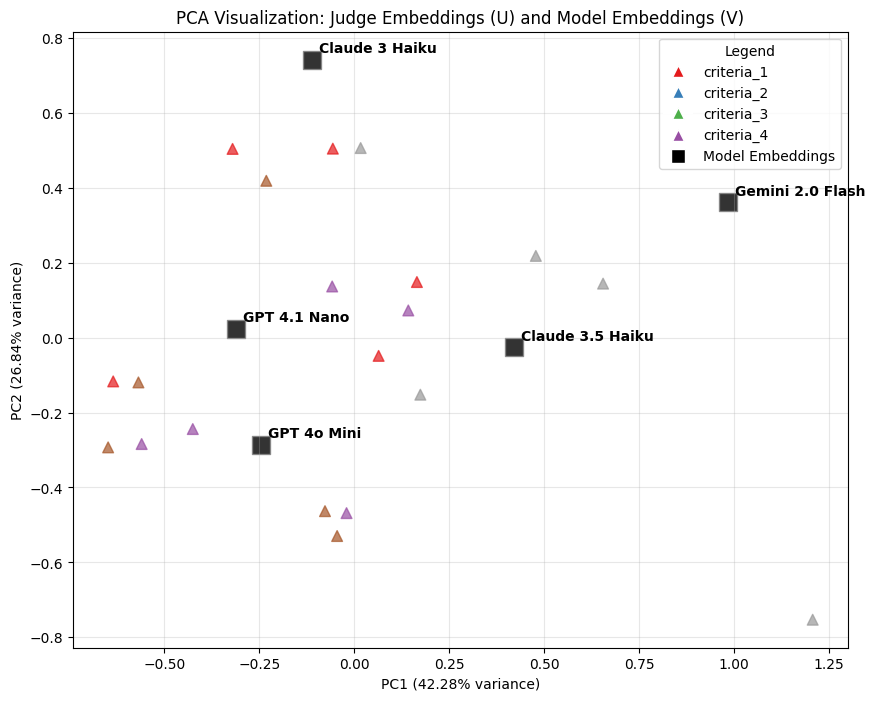

In [13]:
# Extract embeddings
    with torch.no_grad():
    u_embeddings = model.u.weight.cpu().numpy()  # shape: (num_criteria * num_models, d)
    v_embeddings = model.v.weight.cpu().numpy()  # shape: (num_models, d)

# Combine all embeddings for PCA
all_embeddings = np.vstack([u_embeddings, v_embeddings])

# Fit PCA on all embeddings
pca = PCA(n_components=2)
all_2d = pca.fit_transform(all_embeddings)

# Split back into u and v
u_2d = all_2d[:len(u_embeddings)]
v_2d = all_2d[len(u_embeddings):]

# Create colors for u embeddings based on criteria
criteria_colors = []
for c in range(num_criteria):
    for m in range(num_models):
        criteria_colors.append(c)

# Plot
plt.figure(figsize=(10, 8))

# Plot U embeddings colored by criteria
scatter_u = plt.scatter(u_2d[:, 0], u_2d[:, 1], s=60, alpha=0.7, 
                       c=criteria_colors, cmap='Set1', marker='^', label='Judge Embeddings (U)')

# Plot V embeddings
plt.scatter(v_2d[:, 0], v_2d[:, 1], s=150, alpha=0.8, c='black', 
           marker='s', label='Model Embeddings (V)', edgecolors='gray')

# Add labels for V embeddings
for i, name in enumerate(model_names):
    plt.annotate(name, (v_2d[i, 0], v_2d[i, 1]), xytext=(5, 5), 
                textcoords='offset points', fontweight='bold')

# Add legend for criteria
criteria_legend = [plt.Line2D([0], [0], marker='^', color='w', 
                             markerfacecolor=plt.cm.Set1(i), markersize=8, 
                             label=name) for i, name in enumerate(criteria_names)]
criteria_legend.append(plt.Line2D([0], [0], marker='s', color='w', 
                                 markerfacecolor='black', markersize=10, 
                                 label='Model Embeddings'))

plt.legend(handles=criteria_legend, title='Legend')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA Visualization: Judge Embeddings (U) and Model Embeddings (V)')
plt.grid(True, alpha=0.3)
plt.show()

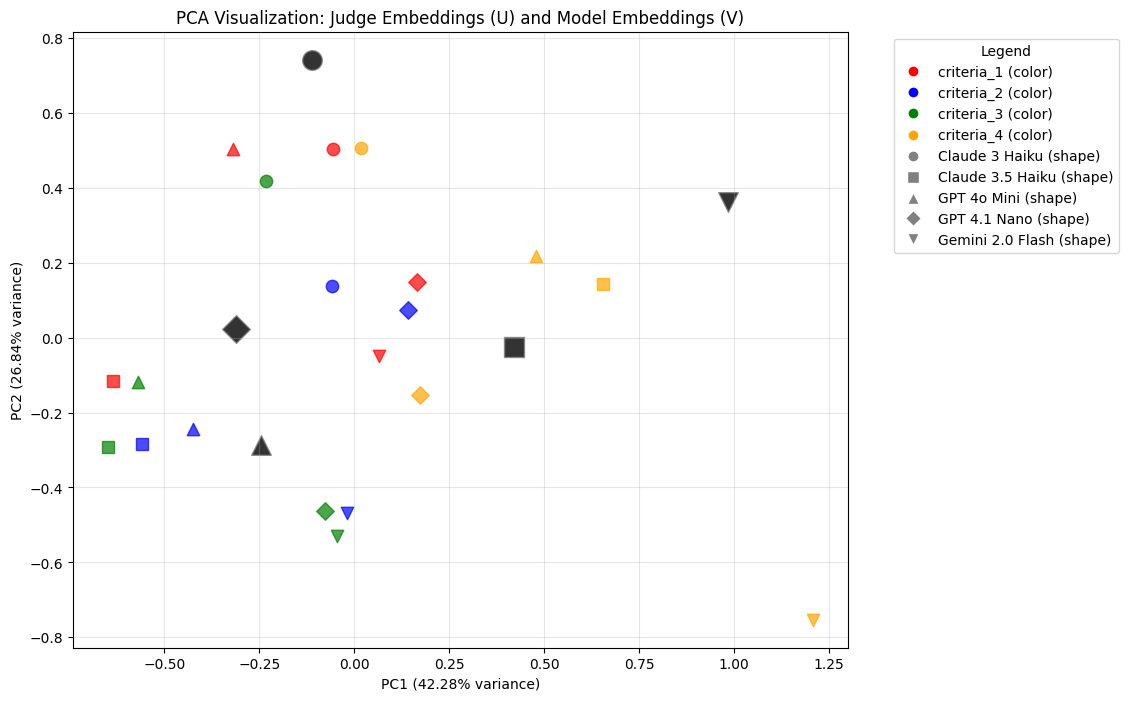

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract embeddings
with torch.no_grad():
    u_embeddings = model.u.weight.cpu().numpy()  # shape: (num_criteria * num_models, d)
    v_embeddings = model.v.weight.cpu().numpy()  # shape: (num_models, d)

# Combine all embeddings for PCA
all_embeddings = np.vstack([u_embeddings, v_embeddings])

# Fit PCA on all embeddings
pca = PCA(n_components=2)
all_2d = pca.fit_transform(all_embeddings)

# Split back into u and v
u_2d = all_2d[:len(u_embeddings)]
v_2d = all_2d[len(u_embeddings):]

# Create explicit colors for u embeddings based on criteria
color_palette = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
criteria_color_map = {i: color_palette[i % len(color_palette)] for i in range(num_criteria)}

# Create marker shapes for each model
marker_shapes = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', 'H', 'X']
model_marker_map = {i: marker_shapes[i % len(marker_shapes)] for i in range(num_models)}

# Plot
plt.figure(figsize=(10, 8))

# Plot U embeddings colored by criteria, shaped by model
u_idx = 0
for c in range(num_criteria):
    for m in range(num_models):
        plt.scatter(u_2d[u_idx, 0], u_2d[u_idx, 1], s=80, alpha=0.7, 
                   c=criteria_color_map[c], marker=model_marker_map[m])
        u_idx += 1

# Plot V embeddings with different shapes for each model
for i in range(num_models):
    plt.scatter(v_2d[i, 0], v_2d[i, 1], s=200, alpha=0.8, c='black', 
               marker=model_marker_map[i], edgecolors='gray')

# Add legend for criteria (colors) and models (shapes)
criteria_legend = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=criteria_color_map[i], markersize=8, 
                             label=f'{name} (color)') for i, name in enumerate(criteria_names)]

model_legend = [plt.Line2D([0], [0], marker=model_marker_map[i], color='w', 
                          markerfacecolor='gray', markersize=8, 
                          label=f'{name} (shape)') for i, name in enumerate(model_names)]

# Combine legends
all_legend = criteria_legend + model_legend
plt.legend(handles=all_legend, title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA Visualization: Judge Embeddings (U) and Model Embeddings (V)')
plt.grid(True, alpha=0.3)
plt.show()

## 5x5 PCA experiment

In [1]:
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import ast
from BT import *
from eigentrust import *


/Users/jchang153/miniforge3/envs/tf-metal/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
inv_func = {
    0: '(0, 0)',
    1: '(0, 1)',
    2: '(0, 2)',
    3: '(0, 3)',
    4: '(0, 4)',
    5: '(1, 0)',
    6: '(1, 1)',
    7: '(1, 2)',
    8: '(1, 3)',
    9: '(1, 4)',
    10: '(2, 0)',
    11: '(2, 1)',
    12: '(2, 2)',
    13: '(2, 3)',
    14: '(2, 4)',
    15: '(3, 0)',
    16: '(3, 1)',
    17: '(3, 2)',
    18: '(3, 3)',
    19: '(3, 4)',
    20: '(4, 0)',
    21: '(4, 1)',
    22: '(4, 2)',
    23: '(4, 3)',
    24: '(4, 4)',
}
models = ["Claude 3 Haiku", "Claude 3.5 Haiku", "GPT 4o Mini", "GPT 4.1 Nano", "Gemini 2.0 Flash"]
models = ["Claude 4 Sonnet", "GPT 4.1", "Gemini 2.5 Pro", "Grok 4", "DeepSeek v3"]

personas = ["Neutral", "Utilitarian", "Taoist", "Empathetic", "Corporate"]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ast
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches


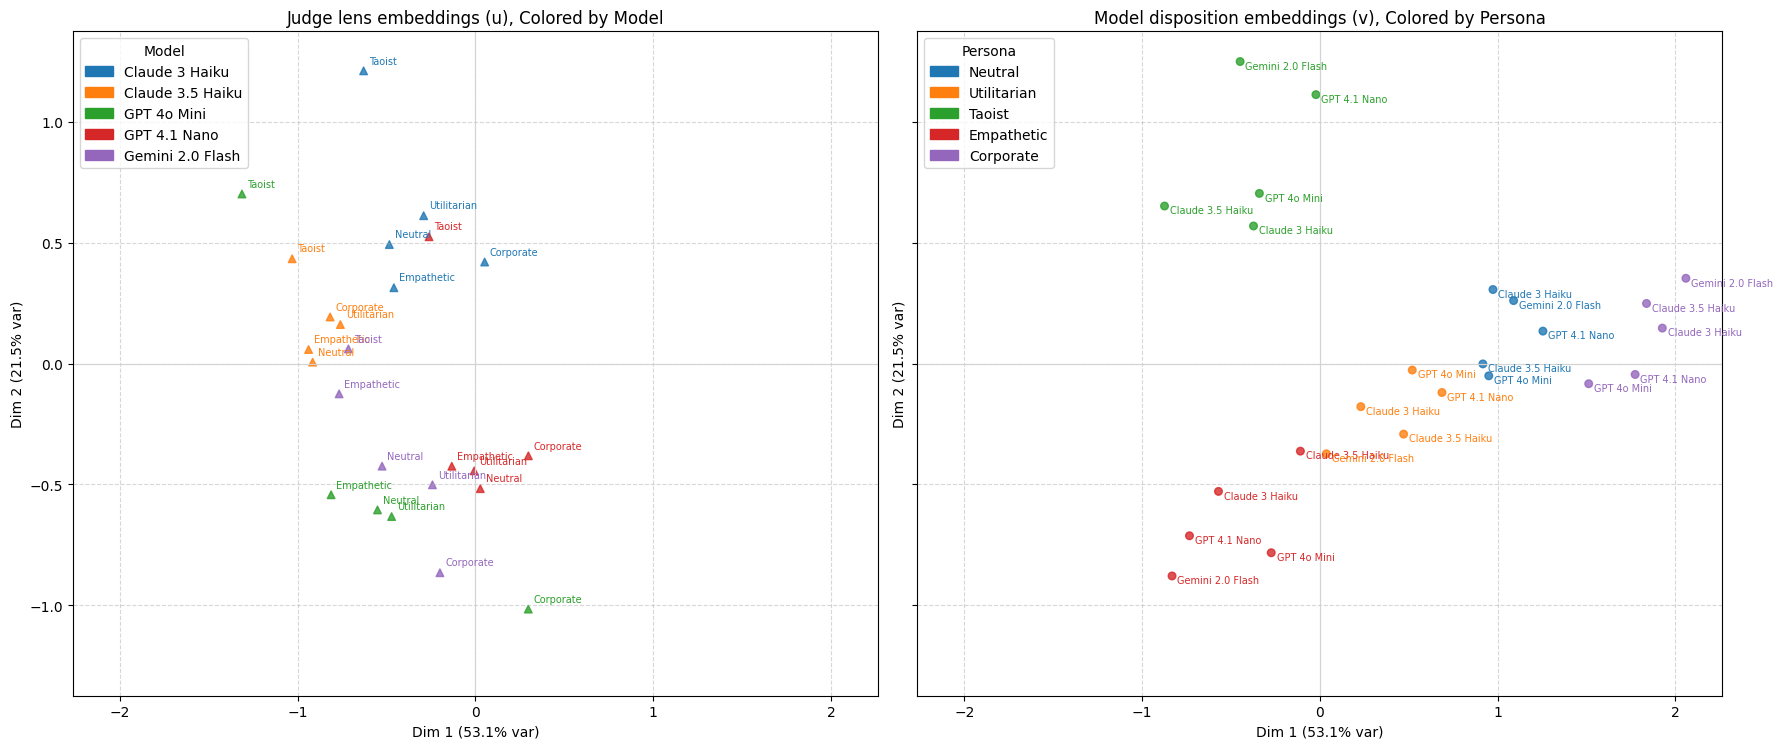

In [15]:
# 1) PCA → 2D (and grab explained variance)
data = np.vstack([u_weights, v_weights])
pca = PCA(n_components=2)
proj = pca.fit_transform(data)
var_ratios = pca.explained_variance_ratio_

N    = u_weights.shape[0]
u_2d = proj[:N]
v_2d = proj[N:]

# 2) Extract model‐ and persona‐IDs
model_ids   = [ast.literal_eval(inv_func[i])[0] for i in range(N)]
persona_ids = [ast.literal_eval(inv_func[i])[1] for i in range(N)]
cmap        = plt.get_cmap('tab10')
colors_model   = [cmap(mid) for mid in model_ids]
colors_persona = [cmap(pid) for pid in persona_ids]

# 3) Create subplots (shared axes)
fig, (ax_u, ax_v) = plt.subplots(
    1, 2, figsize=(18,8), sharex=True, sharey=True
)

# 4) Scatter: left by model‐color, right by persona‐color
ax_u.scatter(u_2d[:,0], u_2d[:,1],
             marker='^', s=30, c=colors_model, alpha=0.8)
ax_v.scatter(v_2d[:,0], v_2d[:,1],
             marker='o', s=30, c=colors_persona, alpha=0.8)

# 5) Annotate manually: u’s get persona‐labels, v’s get model‐labels
for i in range(N):
    m_idx = model_ids[i]
    p_idx = persona_ids[i]

    # Left: label persona on u
    info_persona = personas[p_idx]
    ax_u.text(
        u_2d[i,0] + 0.03, u_2d[i,1] + 0.03,
        info_persona, fontsize=7, color=colors_model[i], ha='left'
    )

    # Right: label model on v
    info_model = models[m_idx]
    ax_v.text(
        v_2d[i,0] + 0.03, v_2d[i,1] - 0.03,
        info_model, fontsize=7, color=colors_persona[i], ha='left'
    )

# 6) Align grids & zero‐lines
lim_x = np.max(np.abs(proj[:,0])) * 1.1
lim_y = np.max(np.abs(proj[:,1])) * 1.1
for ax in (ax_u, ax_v):
    ax.set_xlim(-lim_x, lim_x)
    ax.set_ylim(-lim_y, lim_y)
    ax.axhline(0, color='lightgray', linewidth=0.8)
    ax.axvline(0, color='lightgray', linewidth=0.8)
    ax.grid(True, which='both', linestyle='--', alpha=0.5)

# 7) Titles & labels with variance explained
xlabel = f"Dim 1 ({var_ratios[0]*100:.1f}% var)"
ylabel = f"Dim 2 ({var_ratios[1]*100:.1f}% var)"

ax_u.set_title("Judge lens embeddings (u), Colored by Model")
ax_v.set_title("Model disposition embeddings (v), Colored by Persona")
for ax in (ax_u, ax_v):
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# 8) Legends: left for models, right for personas
model_handles = [
    mpatches.Patch(color=cmap(i), label=models[i]) 
    for i in sorted(set(model_ids))
]
persona_handles = [
    mpatches.Patch(color=cmap(i), label=personas[i]) 
    for i in sorted(set(persona_ids))
]
ax_u.legend(handles=model_handles, title="Model", loc='upper left')
ax_v.legend(handles=persona_handles, title="Persona", loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('figures/PCA.png', dpi=300)  # Optional: Save the figure
plt.show()


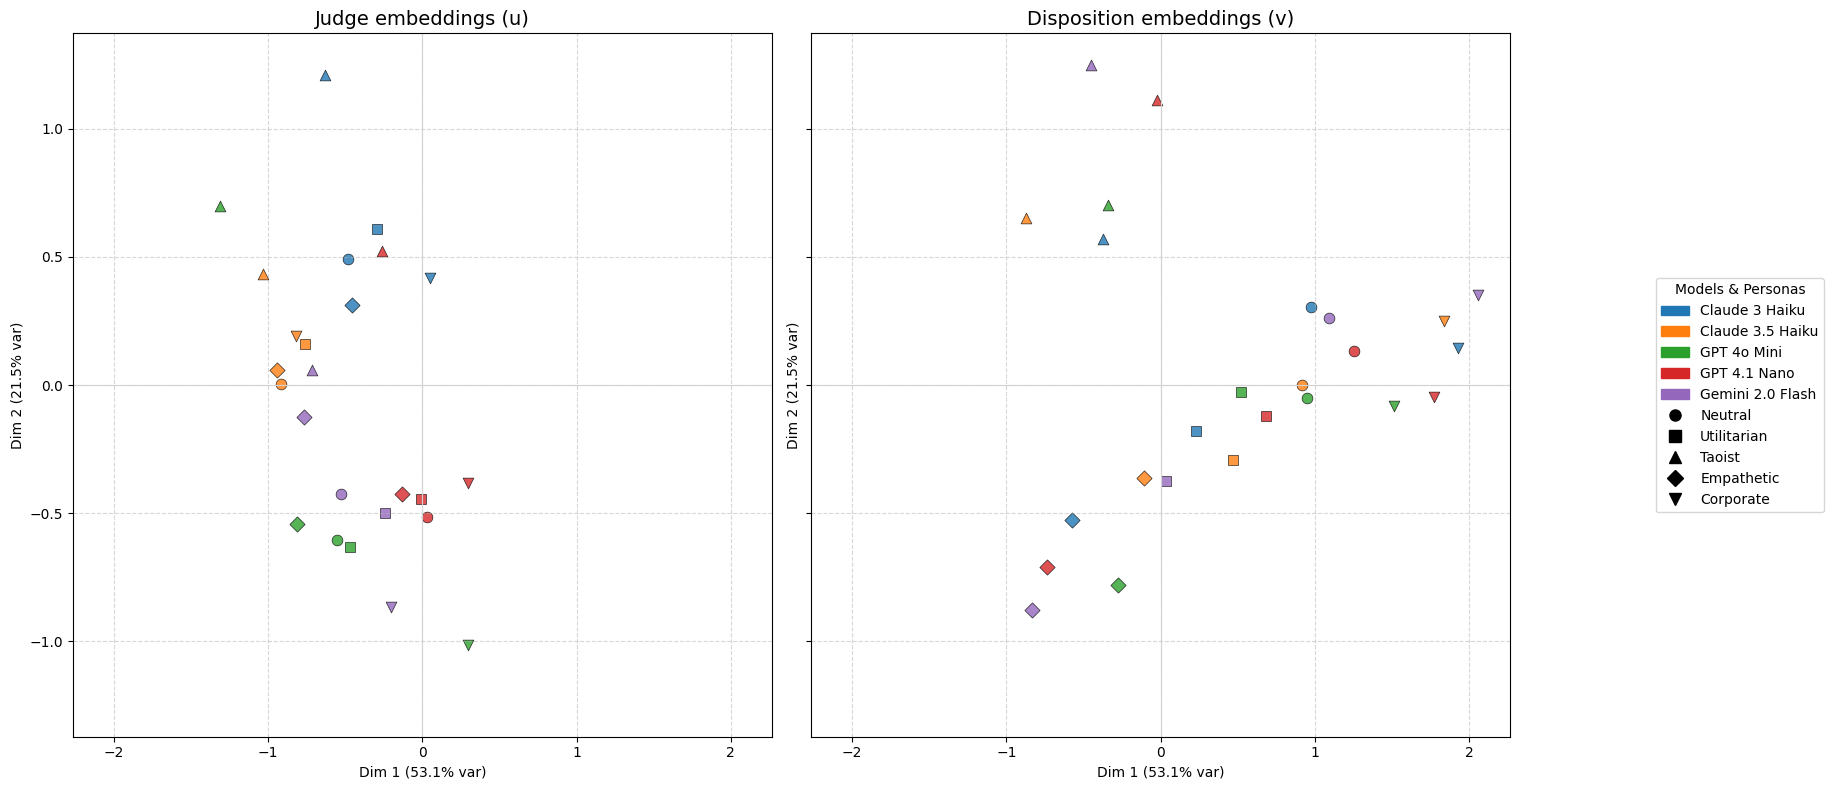

In [16]:
# --- 1) Stack & run PCA to 2D ---
data = np.vstack([u_weights, v_weights])
pca = PCA(n_components=2)
proj = pca.fit_transform(data)
var_ratios = pca.explained_variance_ratio_

N = u_weights.shape[0]
u_2d = proj[:N]
v_2d = proj[N:]

# --- 2) Extract IDs & unique sets ---
model_ids   = [ast.literal_eval(inv_func[i])[0] for i in range(N)]
persona_ids = [ast.literal_eval(inv_func[i])[1] for i in range(N)]
unique_models   = sorted(set(model_ids))
unique_personas = sorted(set(persona_ids))

# --- 3) Build colour‐map and marker‐map ---
cmap      = plt.get_cmap('tab10')
color_map = {m: cmap(i) for i, m in enumerate(unique_models)}

markers = ['o','s','^','D','v','<','>','P','X','*']  # must be ≥ #personas
marker_map = {p: markers[i] for i, p in enumerate(unique_personas)}

# --- 4) Make subplots ---
fig, (ax_u, ax_v) = plt.subplots(1, 2, figsize=(18,8),
                                 sharex=True, sharey=True)

# --- 5) Scatter on both axes ---
for ax, pts, title in zip(
    (ax_u, ax_v),
    (u_2d, v_2d),
    ("Judge embeddings (u)", "Disposition embeddings (v)")
):
    for i, (x, y) in enumerate(pts):
        m = model_ids[i]
        p = persona_ids[i]
        ax.scatter(
            x, y,
            c=[color_map[m]],
            marker=marker_map[p],
            s=60, alpha=0.8,
            edgecolor='k', linewidth=0.5
        )
    # title & axes labels
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(f"Dim 1 ({var_ratios[0]*100:.1f}% var)")
    ax.set_ylabel(f"Dim 2 ({var_ratios[1]*100:.1f}% var)")

    # zero‐lines & grid
    lim_x = np.max(np.abs(proj[:,0])) * 1.1
    lim_y = np.max(np.abs(proj[:,1])) * 1.1
    ax.set_xlim(-lim_x, lim_x)
    ax.set_ylim(-lim_y, lim_y)
    ax.axhline(0, color='lightgray', linewidth=0.8)
    ax.axvline(0, color='lightgray', linewidth=0.8)
    ax.grid(True, which='both', linestyle='--', alpha=0.5)

# --- 6) Build combined legend handles ---
model_handles = [
    mpatches.Patch(color=color_map[m], label=models[m])
    for m in unique_models
]
persona_handles = [
    mlines.Line2D([], [], color='black',
                  marker=marker_map[p], linestyle='None',
                  markersize=8, label=personas[p])
    for p in unique_personas
]

all_handles = model_handles + persona_handles
all_labels  = [h.get_label()    for h in all_handles]

# place one legend on the right, outside the plots
fig.legend(
    all_handles,
    all_labels,
    title="Models & Personas",
    loc="center right",
    bbox_to_anchor=(1.02, 0.5)
)

# --- 7) Layout & show/save ---
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

## now with norm u's and v's

In [17]:
path         = 'transcript/20250513_224000/BT_norm/'
model_path   = path + 'model.pt'
num_models   = 25
d            = 6
device       = 'mps'

model = load_vector_bt(model_path, num_models, d, device)

u_weights = model.u.weight.detach().cpu().numpy()
v_weights = model.v.weight.detach().cpu().numpy()

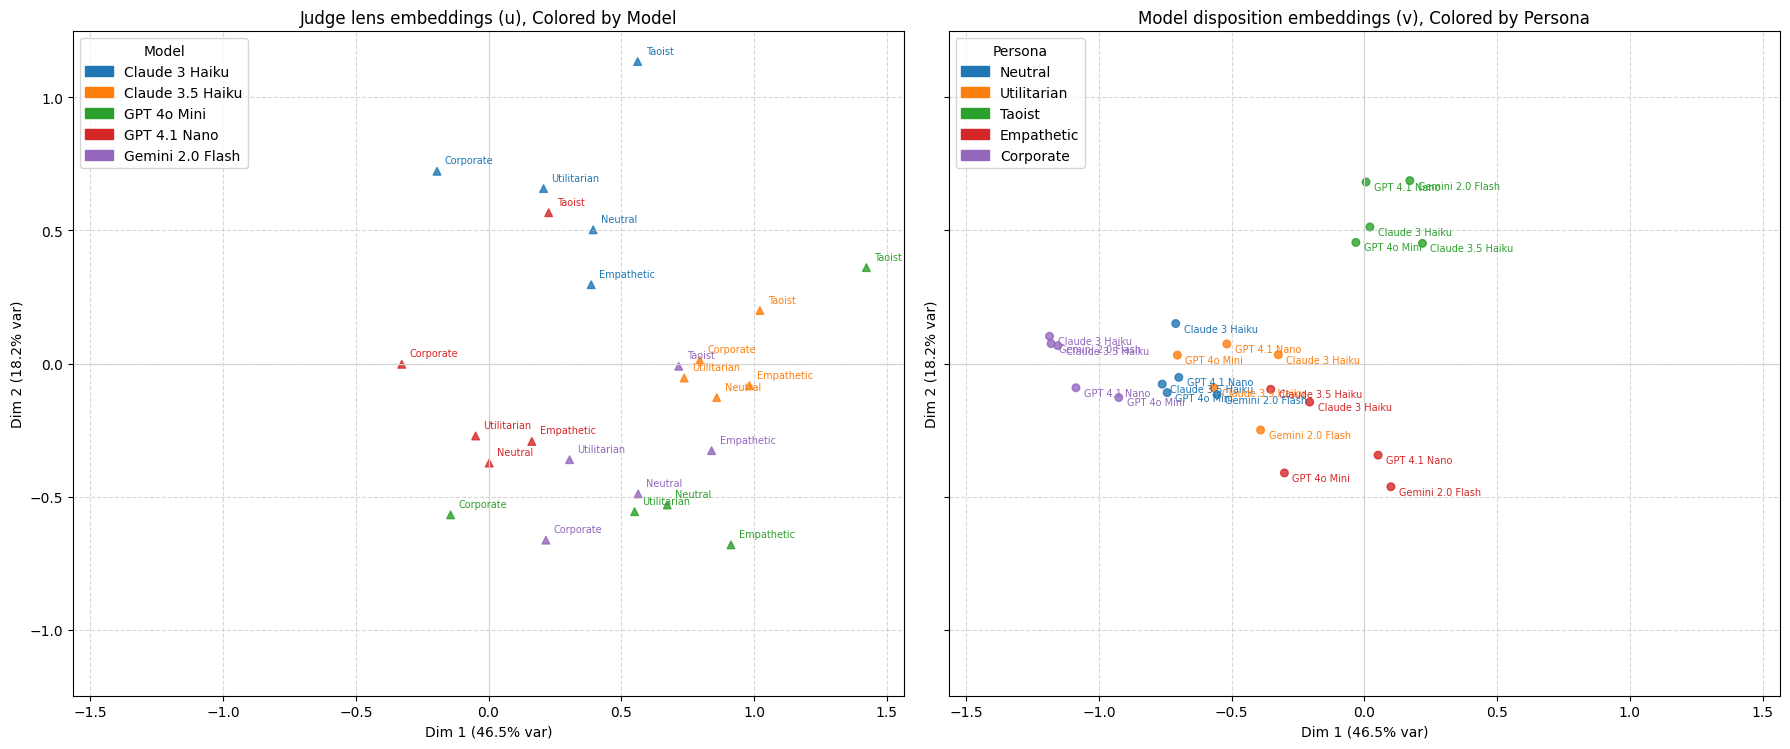

In [18]:
# 1) PCA → 2D (and grab explained variance)
data = np.vstack([u_weights, v_weights])
pca = PCA(n_components=2)
proj = pca.fit_transform(data)
var_ratios = pca.explained_variance_ratio_

N    = u_weights.shape[0]
u_2d = proj[:N]
v_2d = proj[N:]

# 2) Extract model‐ and persona‐IDs
model_ids   = [ast.literal_eval(inv_func[i])[0] for i in range(N)]
persona_ids = [ast.literal_eval(inv_func[i])[1] for i in range(N)]
cmap        = plt.get_cmap('tab10')
colors_model   = [cmap(mid) for mid in model_ids]
colors_persona = [cmap(pid) for pid in persona_ids]

# 3) Create subplots (shared axes)
fig, (ax_u, ax_v) = plt.subplots(
    1, 2, figsize=(18,8), sharex=True, sharey=True
)

# 4) Scatter: left by model‐color, right by persona‐color
ax_u.scatter(u_2d[:,0], u_2d[:,1],
             marker='^', s=30, c=colors_model, alpha=0.8)
ax_v.scatter(v_2d[:,0], v_2d[:,1],
             marker='o', s=30, c=colors_persona, alpha=0.8)

# 5) Annotate manually: u’s get persona‐labels, v’s get model‐labels
for i in range(N):
    m_idx = model_ids[i]
    p_idx = persona_ids[i]

    # Left: label persona on u
    info_persona = personas[p_idx]
    ax_u.text(
        u_2d[i,0] + 0.03, u_2d[i,1] + 0.03,
        info_persona, fontsize=7, color=colors_model[i], ha='left'
    )

    # Right: label model on v
    info_model = models[m_idx]
    ax_v.text(
        v_2d[i,0] + 0.03, v_2d[i,1] - 0.03,
        info_model, fontsize=7, color=colors_persona[i], ha='left'
    )

# 6) Align grids & zero‐lines
lim_x = np.max(np.abs(proj[:,0])) * 1.1
lim_y = np.max(np.abs(proj[:,1])) * 1.1
for ax in (ax_u, ax_v):
    ax.set_xlim(-lim_x, lim_x)
    ax.set_ylim(-lim_y, lim_y)
    ax.axhline(0, color='lightgray', linewidth=0.8)
    ax.axvline(0, color='lightgray', linewidth=0.8)
    ax.grid(True, which='both', linestyle='--', alpha=0.5)

# 7) Titles & labels with variance explained
xlabel = f"Dim 1 ({var_ratios[0]*100:.1f}% var)"
ylabel = f"Dim 2 ({var_ratios[1]*100:.1f}% var)"

ax_u.set_title("Judge lens embeddings (u), Colored by Model")
ax_v.set_title("Model disposition embeddings (v), Colored by Persona")
for ax in (ax_u, ax_v):
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# 8) Legends: left for models, right for personas
model_handles = [
    mpatches.Patch(color=cmap(i), label=models[i]) 
    for i in sorted(set(model_ids))
]
persona_handles = [
    mpatches.Patch(color=cmap(i), label=personas[i]) 
    for i in sorted(set(persona_ids))
]
ax_u.legend(handles=model_handles, title="Model", loc='upper left')
ax_v.legend(handles=persona_handles, title="Persona", loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('figures/PCA.png', dpi=300)  # Optional: Save the figure
plt.show()


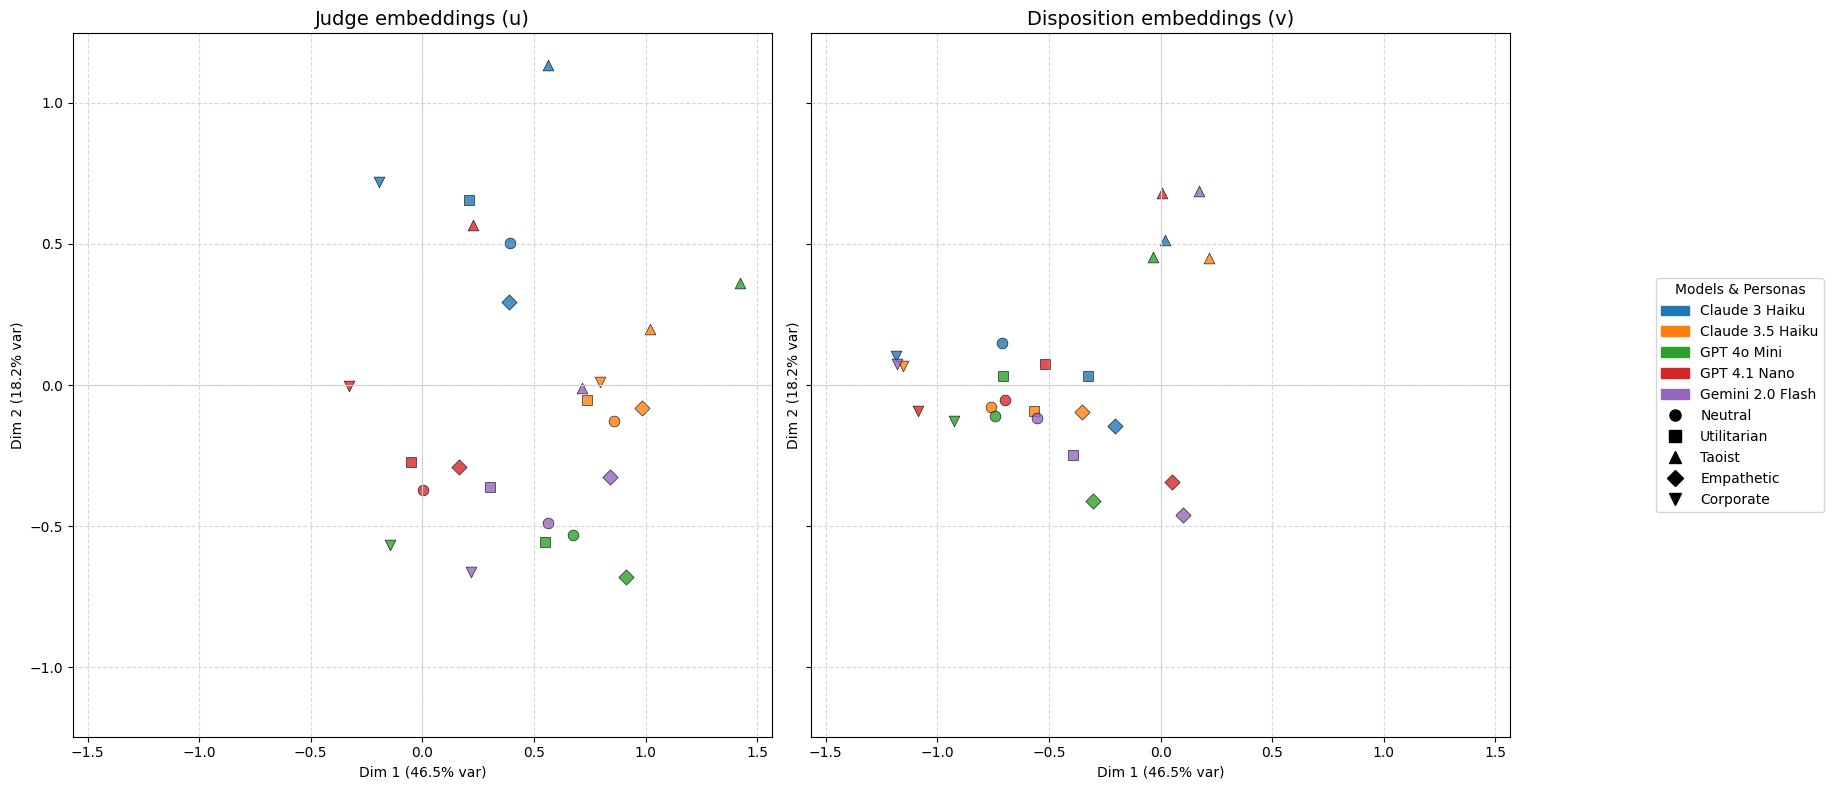

In [13]:
# --- 1) Stack & run PCA to 2D ---
data = np.vstack([u_weights, v_weights])
pca = PCA(n_components=2)
proj = pca.fit_transform(data)
var_ratios = pca.explained_variance_ratio_

N = u_weights.shape[0]
u_2d = proj[:N]
v_2d = proj[N:]

# --- 2) Extract IDs & unique sets ---
model_ids   = [ast.literal_eval(inv_func[i])[0] for i in range(N)]
persona_ids = [ast.literal_eval(inv_func[i])[1] for i in range(N)]
unique_models   = sorted(set(model_ids))
unique_personas = sorted(set(persona_ids))

# --- 3) Build colour‐map and marker‐map ---
cmap      = plt.get_cmap('tab10')
color_map = {m: cmap(i) for i, m in enumerate(unique_models)}

markers = ['o','s','^','D','v','<','>','P','X','*']  # must be ≥ #personas
marker_map = {p: markers[i] for i, p in enumerate(unique_personas)}

# --- 4) Make subplots ---
fig, (ax_u, ax_v) = plt.subplots(1, 2, figsize=(18,8),
                                 sharex=True, sharey=True)

# --- 5) Scatter on both axes ---
for ax, pts, title in zip(
    (ax_u, ax_v),
    (u_2d, v_2d),
    ("Judge embeddings (u)", "Disposition embeddings (v)")
):
    for i, (x, y) in enumerate(pts):
        m = model_ids[i]
        p = persona_ids[i]
        ax.scatter(
            x, y,
            c=[color_map[m]],
            marker=marker_map[p],
            s=60, alpha=0.8,
            edgecolor='k', linewidth=0.5
        )
    # title & axes labels
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(f"Dim 1 ({var_ratios[0]*100:.1f}% var)")
    ax.set_ylabel(f"Dim 2 ({var_ratios[1]*100:.1f}% var)")

    # zero‐lines & grid
    lim_x = np.max(np.abs(proj[:,0])) * 1.1
    lim_y = np.max(np.abs(proj[:,1])) * 1.1
    ax.set_xlim(-lim_x, lim_x)
    ax.set_ylim(-lim_y, lim_y)
    ax.axhline(0, color='lightgray', linewidth=0.8)
    ax.axvline(0, color='lightgray', linewidth=0.8)
    ax.grid(True, which='both', linestyle='--', alpha=0.5)

# --- 6) Build combined legend handles ---
model_handles = [
    mpatches.Patch(color=color_map[m], label=models[m])
    for m in unique_models
]
persona_handles = [
    mlines.Line2D([], [], color='black',
                  marker=marker_map[p], linestyle='None',
                  markersize=8, label=personas[p])
    for p in unique_personas
]

all_handles = model_handles + persona_handles
all_labels  = [h.get_label()    for h in all_handles]

# place one legend on the right, outside the plots
fig.legend(
    all_handles,
    all_labels,
    title="Models & Personas",
    loc="center right",
    bbox_to_anchor=(1.02, 0.5)
)

# --- 7) Layout & show/save ---
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


## Inspecting 5 unit vector constrained models

In [16]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from BT import *
import torch
from sklearn.decomposition import PCA
import seaborn as sns

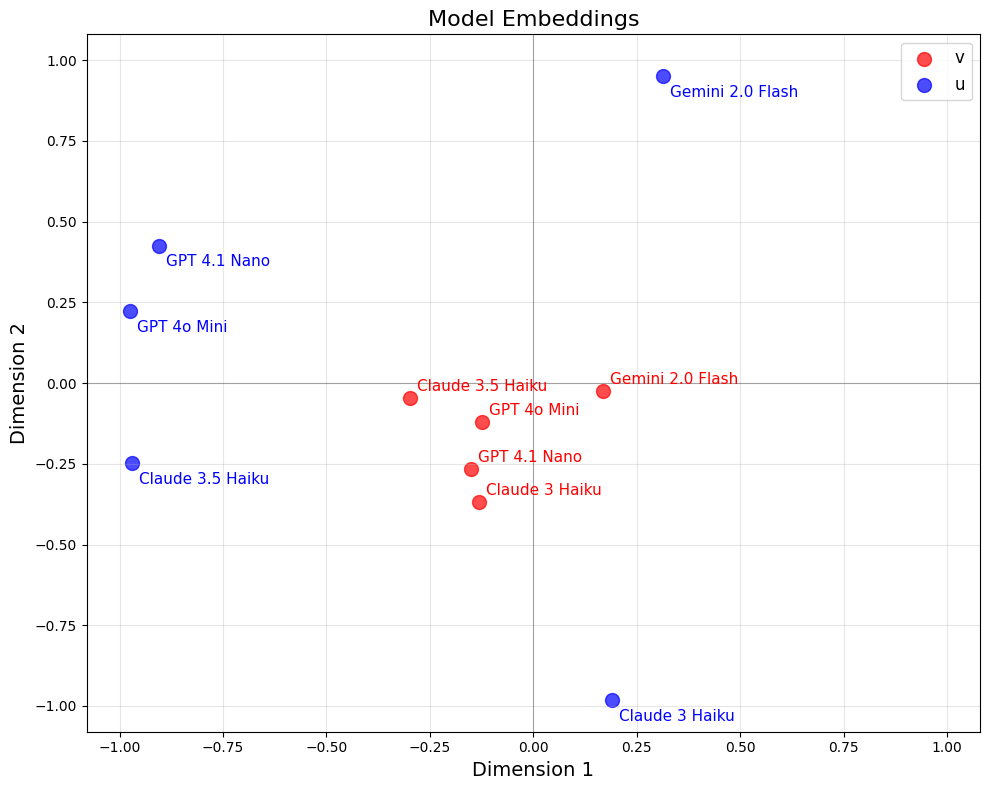

In [39]:
def load_vector_bt(path, num_models, d, device='cpu'):
    model = VectorBT(num_models, d).to(device)
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    return model

path = f'transcript/20250614_000000/unit BT d2/'

d = 2
model_path   = path + 'model.pt'
num_models   = 5

model = load_vector_bt(model_path, num_models, d)
with torch.no_grad():
    u = model.u.weight.cpu().numpy()
    v = model.v.weight.cpu().numpy()
    
# Create visualization
plt.figure(figsize=(10, 8))

plt.scatter(u[:, 0], u[:, 1], c='red', alpha=0.7, s=100, label='v')
plt.scatter(v[:, 0], v[:, 1], c='blue', alpha=0.7, s=100, label='u')

for i in range(len(u)):
    plt.annotate(model_names[i], (u[i, 0], u[i, 1]), xytext=(5, 5), 
                textcoords='offset points', fontsize=11, color='red')
for i in range(len(v)):
    plt.annotate(model_names[i], (v[i, 0], v[i, 1]), xytext=(5, -15), 
                textcoords='offset points', fontsize=11, color='blue')

plt.title('Model Embeddings', fontsize=16)
plt.xlabel('Dimension 1', fontsize=14)
plt.ylabel('Dimension 2', fontsize=14)

# Center around 0/0
all_coords = np.concatenate([u, v], axis=0)
max_range = np.max(np.abs(all_coords)) * 1.1
plt.xlim(-max_range, max_range)
plt.ylim(-max_range, max_range)

# Add origin lines
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)

plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

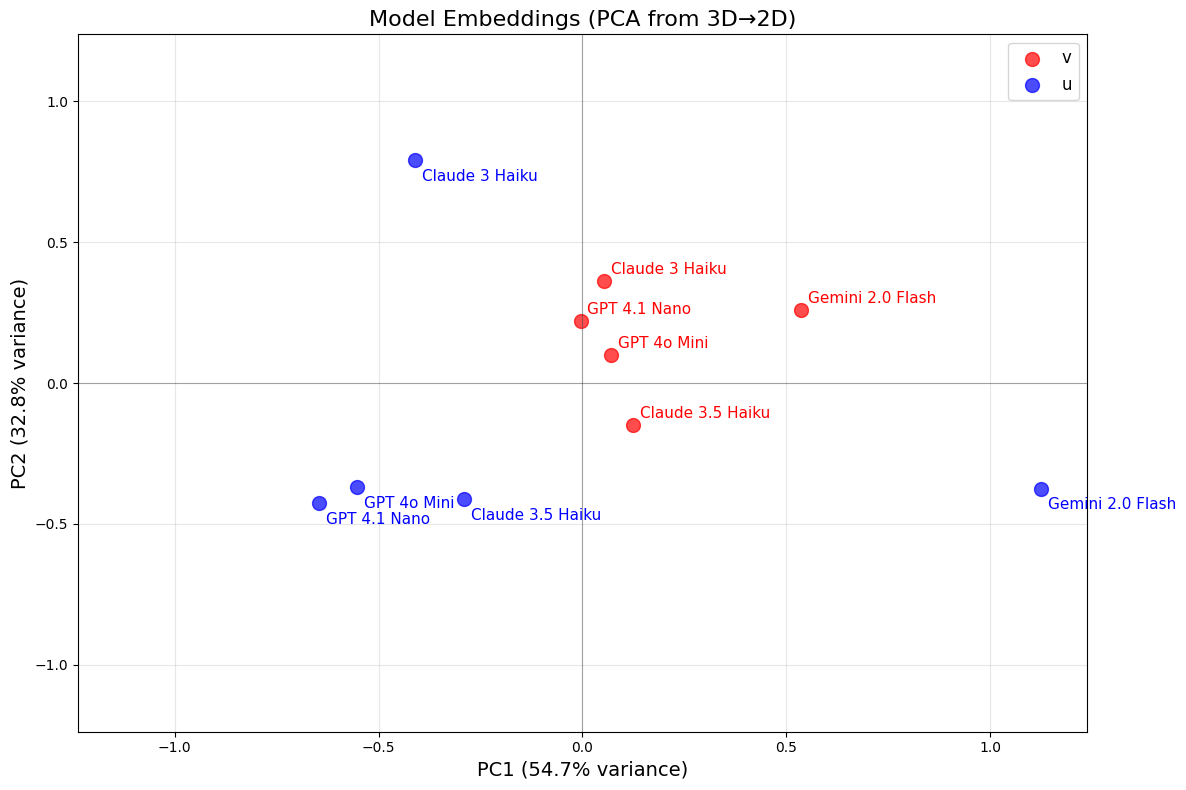

In [38]:
def load_vector_bt(path, num_models, d, device='cpu'):
    model = VectorBT(num_models, d).to(device)
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    return model

path = f'transcript/20250614_000000/unit BT d3/'

d = 3
model_path   = path + 'model.pt'
num_models   = 5

model = load_vector_bt(model_path, num_models, d)
with torch.no_grad():
    u = model.u.weight.cpu().numpy()
    v = model.v.weight.cpu().numpy()

# Model names (same for both judges and models)
model_names = ["Claude 3 Haiku", "Claude 3.5 Haiku", "GPT 4o Mini", "GPT 4.1 Nano", "Gemini 2.0 Flash"]

# Combine all embeddings for PCA
all_embeddings = np.vstack([u, v])  # shape: (10, 3)

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
all_embeddings_2d = pca.fit_transform(all_embeddings)

# Split back into u and v
u_2d = all_embeddings_2d[:5]  # first 5 are judge embeddings
v_2d = all_embeddings_2d[5:]  # next 5 are model embeddings

# Create visualization
plt.figure(figsize=(12, 8))

plt.scatter(u_2d[:, 0], u_2d[:, 1], c='red', alpha=0.7, s=100, label='v')
plt.scatter(v_2d[:, 0], v_2d[:, 1], c='blue', alpha=0.7, s=100, label='u')

for i in range(len(u_2d)):
    plt.annotate(model_names[i], (u_2d[i, 0], u_2d[i, 1]), xytext=(5, 5), 
                textcoords='offset points', fontsize=11, color='red')
for i in range(len(v_2d)):
    plt.annotate(model_names[i], (v_2d[i, 0], v_2d[i, 1]), xytext=(5, -15), 
                textcoords='offset points', fontsize=11, color='blue')

plt.title('Model Embeddings (PCA from 3D→2D)', fontsize=16)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=14)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=14)

# Center around 0/0
all_coords_2d = np.concatenate([u_2d, v_2d], axis=0)
max_range = np.max(np.abs(all_coords_2d)) * 1.1
plt.xlim(-max_range, max_range)
plt.ylim(-max_range, max_range)

# Add origin lines
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)

plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Inspecting 5 BTD models

In [24]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

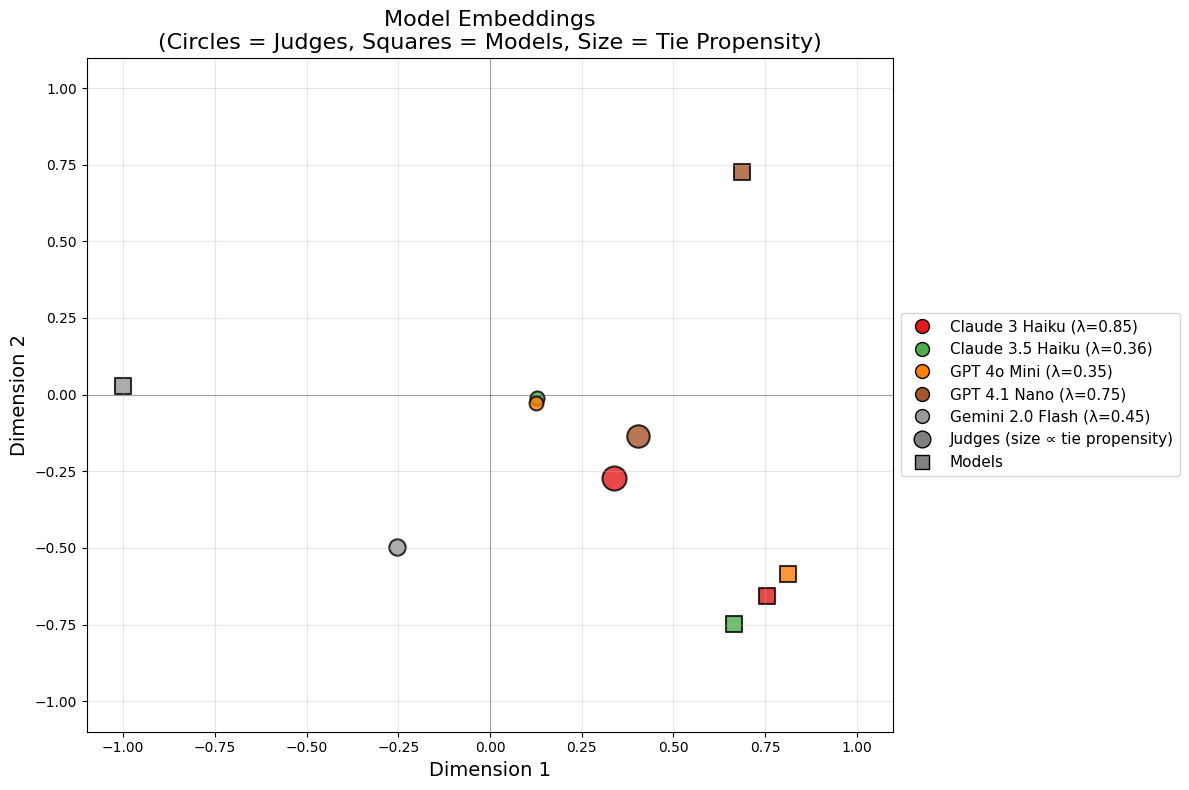

In [33]:
def load_vector_btd(path, num_models, d, device='cpu'):
    model = VectorBTD(num_models, d).to(device)
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    return model

def visualize_btd_with_ties(model, model_names, figsize=(12, 8)):
    """
    Visualize BTD model embeddings using colors and shapes instead of text labels
    - Different colors for each model
    - Circle markers for judges (u), square markers for models (v)
    - Judge size varies with tie propensity (lambda)
    """
    with torch.no_grad():
        u = model.u.weight.cpu().numpy()
        v = model.v.weight.cpu().numpy()
        log_lambda = model.log_lambda.weight.cpu().numpy().flatten()
        lambda_vals = np.exp(log_lambda)  # Convert to actual lambda values
    
    plt.figure(figsize=figsize)
    
    # Define colors for each model
    colors = plt.cm.Set1(np.linspace(0, 1, len(model_names)))  # or use specific colors
    # Alternative specific colors:
    # colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']
    
    # Calculate judge sizes based on tie propensity (lambda values)
    base_size = 100
    max_lambda = np.max(lambda_vals)
    min_lambda = np.min(lambda_vals)
    
    # Normalize lambda values for size scaling
    if max_lambda > min_lambda:
        size_scale = (lambda_vals - min_lambda) / (max_lambda - min_lambda)
    else:
        size_scale = np.ones_like(lambda_vals)
    
    u_sizes = base_size + size_scale * 200  # Size range: 100-300
    v_size = 120  # Fixed size for model embeddings
    
    # Plot judges (u) as circles with varying sizes and model-specific colors
    for i in range(len(u)):
        plt.scatter(u[i, 0], u[i, 1], c=[colors[i]], s=u_sizes[i], 
                   marker='o', alpha=0.8, edgecolors='black', linewidth=1.5,
                   label=f'{model_names[i]} (λ={lambda_vals[i]:.2f})' if i < 6 else "")  # Limit legend entries
    
    # Plot models (v) as squares with model-specific colors
    for i in range(len(v)):
        plt.scatter(v[i, 0], v[i, 1], c=[colors[i]], s=v_size,
                   marker='s', alpha=0.8, edgecolors='black', linewidth=1.5)
    
    plt.title('Model Embeddings\n(Circles = Judges, Squares = Models, Size = Tie Propensity)', fontsize=16)
    plt.xlabel('Dimension 1', fontsize=14)
    plt.ylabel('Dimension 2', fontsize=14)
    
    # Center around 0/0
    all_coords = np.concatenate([u, v], axis=0)
    max_range = np.max(np.abs(all_coords)) * 1.1
    plt.xlim(-max_range, max_range)
    plt.ylim(-max_range, max_range)
    
    # Add origin lines
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
    
    plt.grid(True, alpha=0.3)
    
    # Create custom legend
    from matplotlib.lines import Line2D
    legend_elements = []
    
    # Add model color legend (limit to first 6 to avoid overcrowding)
    for i, (name, color) in enumerate(zip(model_names[:6], colors[:6])):
        legend_elements.append(Line2D([0], [0], marker='o', color='w', 
                                    markerfacecolor=color, markersize=10, 
                                    markeredgecolor='black', markeredgewidth=1,
                                    label=f'{name} (λ={lambda_vals[i]:.2f})'))
    
    # Add shape legend
    legend_elements.extend([
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
               markersize=12, markeredgecolor='black', label='Judges (size ∝ tie propensity)'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='gray', 
               markersize=10, markeredgecolor='black', label='Models')
    ])
    
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)
    plt.tight_layout()
    
    return plt.gcf()

def visualize_btd_minimal(model, model_names, figsize=(10, 8)):
    """
    Minimal version with just shape/size coding and a simple legend
    """
    with torch.no_grad():
        u = model.u.weight.cpu().numpy()
        v = model.v.weight.cpu().numpy()
        log_lambda = model.log_lambda.weight.cpu().numpy().flatten()
        lambda_vals = np.exp(log_lambda)
    
    plt.figure(figsize=figsize)
    
    # Use a nice color palette
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
    
    # Calculate sizes
    base_size = 120
    max_lambda = np.max(lambda_vals)
    min_lambda = np.min(lambda_vals)
    
    if max_lambda > min_lambda:
        size_scale = (lambda_vals - min_lambda) / (max_lambda - min_lambda)
    else:
        size_scale = np.ones_like(lambda_vals)
    
    u_sizes = base_size + size_scale * 180  # Size range: 120-300
    v_size = 100
    
    # Plot all judges
    plt.scatter(u[:, 0], u[:, 1], c=[colors[i % len(colors)] for i in range(len(u))], 
               s=u_sizes, marker='o', alpha=0.8, edgecolors='white', linewidth=2)
    
    # Plot all models  
    plt.scatter(v[:, 0], v[:, 1], c=[colors[i % len(colors)] for i in range(len(v))], 
               s=v_size, marker='s', alpha=0.8, edgecolors='white', linewidth=2)
    
    plt.title('BTD Model Embeddings', fontsize=16, fontweight='bold')
    plt.xlabel('Dimension 1', fontsize=14)
    plt.ylabel('Dimension 2', fontsize=14)
    
    # Center around 0/0
    all_coords = np.concatenate([u, v], axis=0)
    max_range = np.max(np.abs(all_coords)) * 1.15
    plt.xlim(-max_range, max_range)
    plt.ylim(-max_range, max_range)
    
    # Add origin lines
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
    
    plt.grid(True, alpha=0.3)
    
    # Simple legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
               markersize=12, markeredgecolor='white', markeredgewidth=2,
               label='Judges (size ∝ tie propensity)'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='gray', 
               markersize=10, markeredgecolor='white', markeredgewidth=2,
               label='Models')
    ]
    
    plt.legend(handles=legend_elements, fontsize=12, framealpha=0.9)
    plt.tight_layout()
    
    return plt.gcf()

# Usage example:
path = f'transcript/20250614_000000/classic unit BTD d2/'
d = 2
model_path = path + 'model.pt'
num_models = 5

model_names = ["Claude 3 Haiku", "Claude 3.5 Haiku", "GPT 4o Mini", "GPT 4.1 Nano", "Gemini 2.0 Flash"]

model = load_vector_btd(model_path, num_models, d)

# Option 1: Full version with color legend and lambda values
fig1 = visualize_btd_with_ties(model, model_names)
plt.show()

# Option 2: Minimal clean version
# fig2 = visualize_btd_minimal(model, model_names)
# plt.show()

## Inspecting toy example 

In [40]:
model_names = ["GPT 4.1 Mini (corporate)", "GPT 4.1 Mini 1", "GPT 4.1 Mini 2"]

In [ ]:
def load_vector_bt(path, num_models, d, device='cpu'):
    model = VectorBT(num_models, d).to(device)
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    return model

path = f'transcript/20250707_000000/kindness/'

d = 2
model_path   = path + 'model.pt'
num_models   = 3

model = load_vector_bt(model_path, num_models, d)
with torch.no_grad():
    u = model.u.weight.cpu().numpy()
    v = model.v.weight.cpu().numpy()
    
# Create visualization
plt.figure(figsize=(10, 8))

plt.scatter(u[:, 0], u[:, 1], c='red', alpha=0.7, s=100, label='u')
plt.scatter(v[:, 0], v[:, 1], c='blue', alpha=0.7, s=100, label='v')

for i in range(len(u)):
    plt.annotate(model_names[i], (u[i, 0], u[i, 1]), xytext=(5, 5), 
                textcoords='offset points', fontsize=11, color='red')
for i in range(len(v)):
    plt.annotate(model_names[i], (v[i, 0], v[i, 1]), xytext=(5, -15), 
                textcoords='offset points', fontsize=11, color='blue')

plt.title('Model Embeddings', fontsize=16)
plt.xlabel('Dimension 1', fontsize=14)
plt.ylabel('Dimension 2', fontsize=14)

# Center around 0/0
all_coords = np.concatenate([u, v], axis=0)
max_range = np.max(np.abs(all_coords)) * 1.1
plt.xlim(-max_range, max_range)
plt.ylim(-max_range, max_range)

# Add origin lines
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)

plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

RuntimeError: Error(s) in loading state_dict for VectorBT:
	Unexpected key(s) in state_dict: "log_lambda.weight". 

## Incorporate tie propensity for BTD models

In [72]:
from BT import VectorBTD
import torch
import matplotlib.pyplot as plt
import numpy as np

In [11]:
model_names = ["GPT 4.1 Mini (corporate)", "GPT 4.1 Mini 1", "GPT 4.1 Mini 2"]

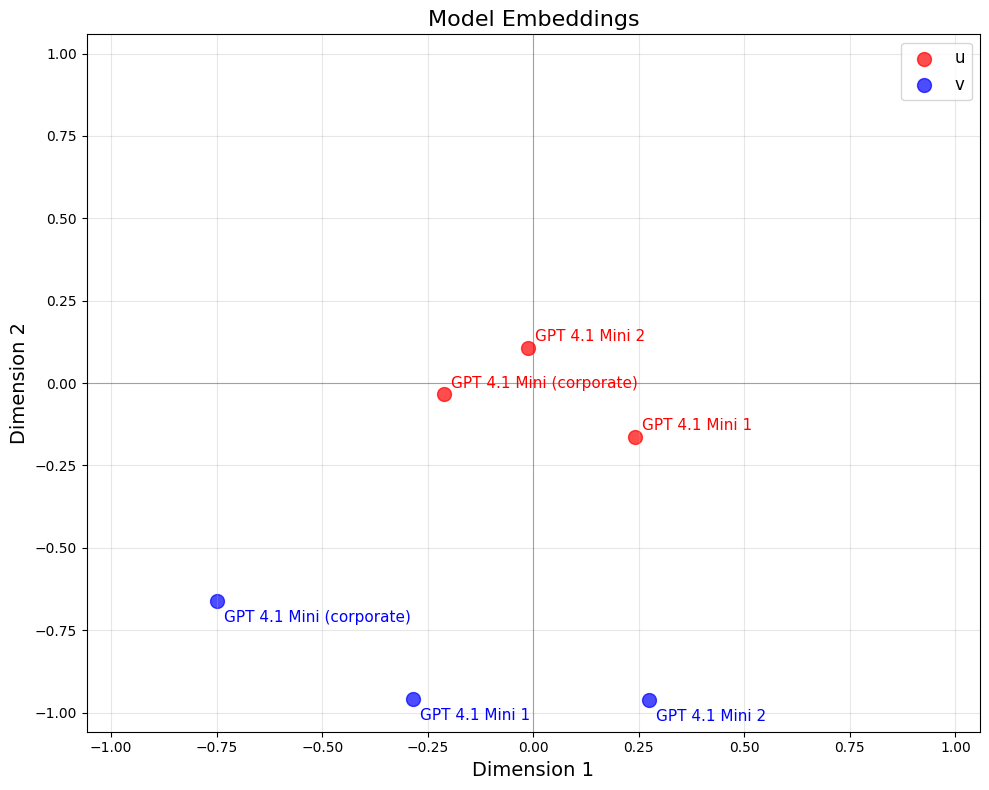

In [15]:
def load_vector_btd(path, num_models, d, device='cpu'):
    model = VectorBTD(num_models, d).to(device)
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    return model

path = f'transcript/20250707_000000/loyalty_btd_unit/'

d = 2
model_path   = path + 'model.pt'
num_models   = 3

model = load_vector_btd(model_path, num_models, d)
with torch.no_grad():
    u = model.u.weight.cpu().numpy()
    v = model.v.weight.cpu().numpy()
    
# Create visualization
plt.figure(figsize=(10, 8))

plt.scatter(u[:, 0], u[:, 1], c='red', alpha=0.7, s=100, label='u')
plt.scatter(v[:, 0], v[:, 1], c='blue', alpha=0.7, s=100, label='v')

for i in range(len(u)):
    plt.annotate(model_names[i], (u[i, 0], u[i, 1]), xytext=(5, 5), 
                textcoords='offset points', fontsize=11, color='red')
for i in range(len(v)):
    plt.annotate(model_names[i], (v[i, 0], v[i, 1]), xytext=(5, -15), 
                textcoords='offset points', fontsize=11, color='blue')

plt.title('Model Embeddings', fontsize=16)
plt.xlabel('Dimension 1', fontsize=14)
plt.ylabel('Dimension 2', fontsize=14)

# Center around 0/0
all_coords = np.concatenate([u, v], axis=0)
max_range = np.max(np.abs(all_coords)) * 1.1
plt.xlim(-max_range, max_range)
plt.ylim(-max_range, max_range)

# Add origin lines
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)

plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

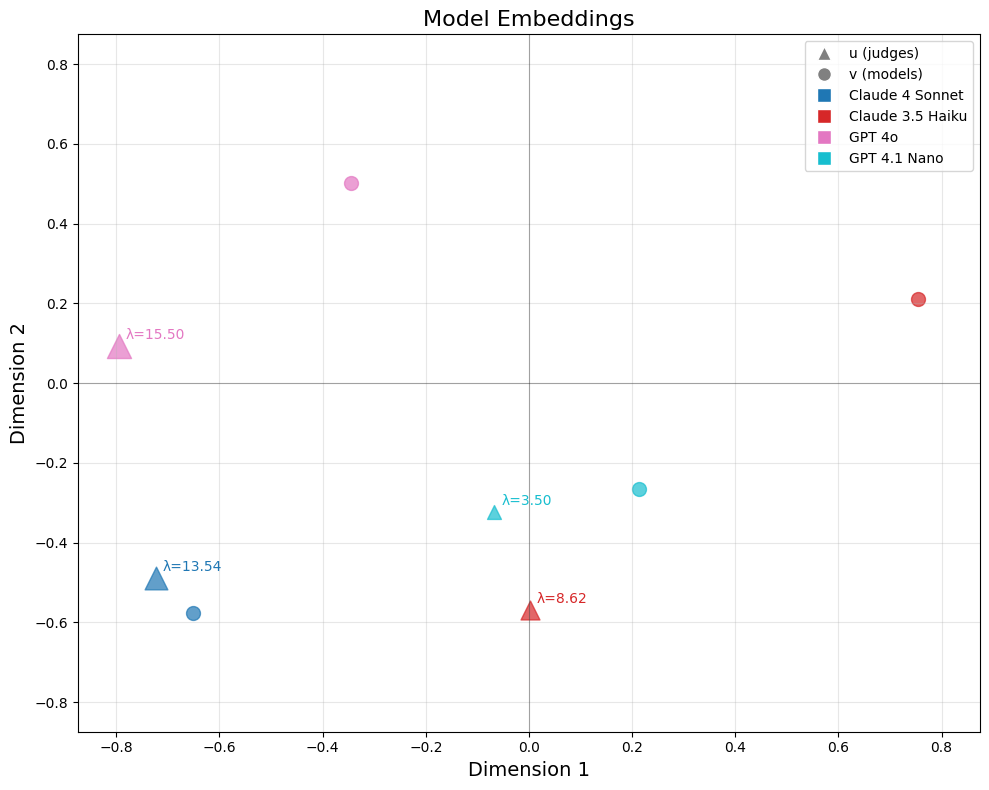

In [30]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.cm as cm
from BT_criteria import VectorBTD

# def load_vector_btd(path, num_models, d, device='cpu'):
#     model = VectorBTD(num_models, d).to(device)
#     model.load_state_dict(torch.load(path, map_location=device))
#     model.eval()
#     return model

def load_vector_btd(path, num_criteria, num_models, d, device='cpu'):
    model = VectorBTD(num_criteria, num_models, d).to(device)
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    return model

def visualize_btd_with_ties(model, model_names, figsize=(10, 8)):
    """
    Visualize BTD model embeddings with judge tie propensity shown as point size
    Uses shapes to distinguish u's and v's, colors to distinguish model names
    """
    with torch.no_grad():
        u = model.u.weight.cpu().numpy()
        v = model.v.weight.cpu().numpy()
        log_lambda = model.log_lambda.weight.cpu().numpy().flatten()
        lambda_vals = np.exp(log_lambda)  # Convert to actual lambda values
    
    plt.figure(figsize=figsize)
    
    # Create color map for model names
    colors = cm.tab10(np.linspace(0, 1, len(model_names)))
    
    # Use lambda values to determine judge point sizes (tie propensity)
    base_size = 100
    max_lambda = np.max(lambda_vals)
    min_lambda = np.min(lambda_vals)
    
    # Normalize lambda values for size scaling
    if max_lambda > min_lambda:
        size_scale = (lambda_vals - min_lambda) / (max_lambda - min_lambda)
    else:
        size_scale = np.ones_like(lambda_vals)
    
    u_sizes = base_size + size_scale * 200  # Size range: 100-300
    v_sizes = 100  # Fixed size for model embeddings
    
    # Plot u's and v's with different shapes but model-specific colors
    for i in range(len(model_names)):
        if i < len(u):  # Make sure we don't go out of bounds
            plt.scatter(u[i, 0], u[i, 1], c=[colors[i]], alpha=0.7, s=u_sizes[i], 
                       marker='^', label=f'{model_names[i]} (u)' if i == 0 else "")
        if i < len(v):  # Make sure we don't go out of bounds
            plt.scatter(v[i, 0], v[i, 1], c=[colors[i]], alpha=0.7, s=v_sizes, 
                       marker='o', label=f'{model_names[i]} (v)' if i == 0 else "")
    
    # Add lambda annotations for judges only
    for i in range(len(u)):
        if i < len(model_names):
            plt.annotate(f'λ={lambda_vals[i]:.2f}', 
                        (u[i, 0], u[i, 1]), xytext=(5, 5), 
                        textcoords='offset points', fontsize=10, color=colors[i])
    
    plt.title('Model Embeddings', fontsize=16)
    plt.xlabel('Dimension 1', fontsize=14)
    plt.ylabel('Dimension 2', fontsize=14)
    
    # Center around 0/0
    all_coords = np.concatenate([u, v], axis=0)
    max_range = np.max(np.abs(all_coords)) * 1.1
    plt.xlim(-max_range, max_range)
    plt.ylim(-max_range, max_range)
    
    # Add origin lines
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
    
    plt.grid(True, alpha=0.3)
    
    # Create custom legend
    legend_elements = []
    
    # Add shape legend
    from matplotlib.lines import Line2D
    legend_elements.append(Line2D([0], [0], marker='^', color='w', markerfacecolor='gray', 
                                 markersize=10, label='u (judges)', linestyle='None'))
    legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
                                 markersize=10, label='v (models)', linestyle='None'))
    
    # Add model name colors
    for i, model_name in enumerate(model_names):
        legend_elements.append(Line2D([0], [0], marker='s', color='w', markerfacecolor=colors[i], 
                                     markersize=10, label=model_name, linestyle='None'))
    
    plt.legend(handles=legend_elements, fontsize=10, loc='best')
    plt.tight_layout()
    
    return plt.gcf()

# Usage example:
path = f'transcript/20250730_000000/openai/btd d2/'
d = 2
model_path = path + 'model.pt'
num_models = 4
num_criteria = 1

# You'll need to define model_names
model_names = ["GPT 4.1 Mini (corporate)", "GPT 4.1 Mini (taoist)", "GPT 4.1 Mini (greenbeard)", "GPT 4.1 Mini 1", "GPT 4.1 Mini 2"]  # Replace with your actual model names
model_names = ["GPT 4.1 Mini (ani)", "GPT 4.1 Mini (metaphor)", "GPT 4.1 Mini (greenbeard)", "GPT 4.1 Mini (neutral 1)", "GPT 4.1 Mini (neutral 2)"]
model_names = ["GPT 4.1 Mini (corporate)", "GPT 4.1 Mini (taoist)", "GPT 4.1 Mini (greenbeard)", "GPT 4.1 Mini (neutral 1)", "GPT 4.1 Mini (neutral 2)", "GPT 4.1 Mini (ani)", "GPT 4.1 Mini (metaphor)"]
model_names = ["Claude 4 Sonnet", "Claude 3.5 Haiku", "GPT 4.1", "Gemini 2.5 Pro", "Grok 4", "DeepSeek v3"]
model_names = ["Claude 4 Sonnet", "Claude 3.5 Haiku", "GPT 4o", 'GPT 4.1 Nano']


model = load_vector_btd(model_path, num_criteria, num_models, d)
visualize_btd_with_ties(model, model_names)
plt.show()

In [87]:
# Usage example:
path = f'transcript/20250722_100000/btd d1/'
d = 1
model_path = path + 'model.pt'
num_models = 7

# You'll need to define model_names
model_names = ["GPT 4.1 Mini (corporate)", "GPT 4.1 Mini (taoist)", "GPT 4.1 Mini (greenbeard)", "GPT 4.1 Mini 1", "GPT 4.1 Mini 2"]  # Replace with your actual model names
model_names = ["GPT 4.1 Mini (ani)", "GPT 4.1 Mini (metaphor)", "GPT 4.1 Mini (greenbeard)", "GPT 4.1 Mini (neutral 1)", "GPT 4.1 Mini (neutral 2)"]
model_names = ["GPT 4.1 Mini (corporate)", "GPT 4.1 Mini (taoist)", "GPT 4.1 Mini (greenbeard)", "GPT 4.1 Mini (neutral 1)", "GPT 4.1 Mini (neutral 2)", "GPT 4.1 Mini (ani)", "GPT 4.1 Mini (metaphor)"]

model = load_vector_btd(model_path, num_models, d)

In [88]:
print(model.u.weight.detach().numpy())
print(model.v.weight.detach().numpy())
with torch.no_grad():
    log_lambda = model.log_lambda.weight.cpu().numpy().flatten()
    lambda_vals = np.exp(log_lambda)
print(lambda_vals)

[[-1.5175316]
 [-1.8389802]
 [-0.5285941]
 [-1.4023982]
 [-1.304321 ]
 [-1.165697 ]
 [-1.4684968]]
[[-0.5025896 ]
 [-1.2484841 ]
 [ 1.1195371 ]
 [-0.57335424]
 [-0.63484234]
 [ 2.2542133 ]
 [-0.9010169 ]]
[0.6216746  0.82061255 0.72449476 0.66525674 0.5714434  0.6178624
 0.7391354 ]


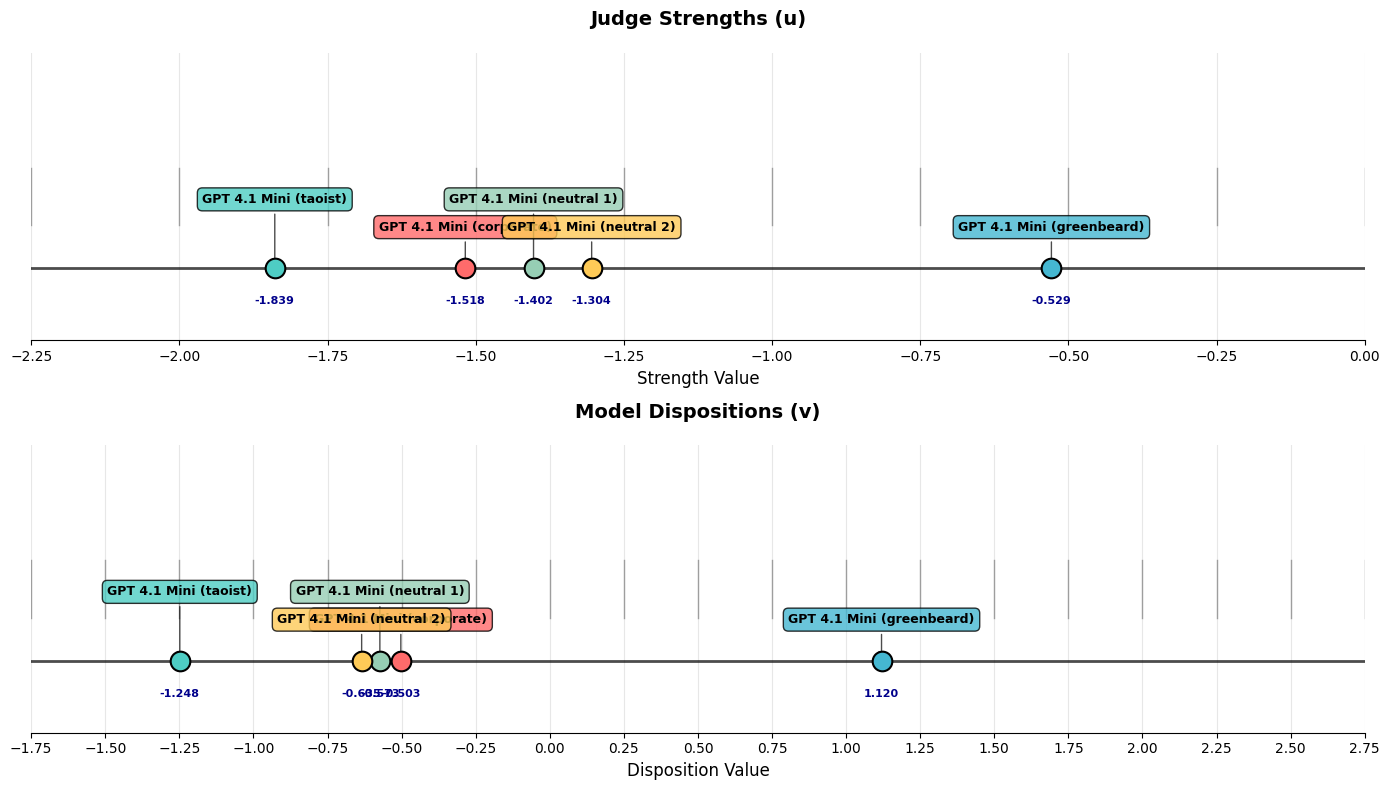

In [89]:
# Data
judge_strengths = model.u.weight.detach().numpy()
model_dispositions = model.v.weight.detach().numpy()
model_names = ["GPT 4.1 Mini (ani)", "GPT 4.1 Mini (metaphor)", "GPT 4.1 Mini (greenbeard)", 
               "GPT 4.1 Mini (neutral 1)", "GPT 4.1 Mini (neutral 2)"]
model_names = ["GPT 4.1 Mini (corporate)", "GPT 4.1 Mini (taoist)", "GPT 4.1 Mini (greenbeard)", "GPT 4.1 Mini (neutral 1)", "GPT 4.1 Mini (neutral 2)", "GPT 4.1 Mini (ani)", "GPT 4.1 Mini (metaphor)"]


# Flatten the arrays (remove the nested structure)
u_values = [item[0] for item in judge_strengths]
v_values = [item[0] for item in model_dispositions]

# Create figure with two subplots (one for each metric)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Define colors for each model (consistent across both plots)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

# Plot 1: Judge Strengths (u)
def plot_number_line(ax, values, labels, colors, title, y_label):
    # Determine range
    all_values = values
    range_min = min(all_values) - 0.3
    range_max = max(all_values) + 0.3
    
    # Draw the main horizontal line
    ax.axhline(y=0, color='black', linewidth=2, alpha=0.7)
    
    # Add tick marks
    tick_range = np.arange(np.floor(range_min * 4) / 4, np.ceil(range_max * 4) / 4 + 0.25, 0.25)
    for tick in tick_range:
        ax.axvline(x=tick, ymin=0.4, ymax=0.6, color='gray', linewidth=1, alpha=0.7)
    
    # Plot the points
    for i, (val, label, color) in enumerate(zip(values, labels, colors)):
        ax.scatter(val, 0, color=color, s=200, zorder=5, edgecolor='black', linewidth=1.5)
        
        # Add model name as annotation
        offset_y = 25 if i % 2 == 0 else 45  # Alternate heights to avoid overlap
        ax.annotate(label, (val, 0), xytext=(0, offset_y), 
                   textcoords='offset points', ha='center', va='bottom',
                   bbox=dict(boxstyle='round,pad=0.4', facecolor=color, alpha=0.8, edgecolor='black'),
                   arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='black', alpha=0.7),
                   fontsize=9, fontweight='bold')
        
        # Add value label below the point
        ax.annotate(f'{val:.3f}', (val, 0), xytext=(0, -20), 
                   textcoords='offset points', ha='center', va='top',
                   fontsize=8, fontweight='bold', color='darkblue')
    
    # Formatting
    ax.set_xlim(range_min, range_max)
    ax.set_ylim(-0.4, 1.2)
    ax.set_xticks(tick_range)
    ax.set_yticks([])
    ax.grid(True, alpha=0.3, axis='x')
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel(y_label, fontsize=12)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Plot judge strengths
plot_number_line(ax1, u_values, model_names, colors, 
                'Judge Strengths (u)', 'Strength Value')

# Plot model dispositions  
plot_number_line(ax2, v_values, model_names, colors,
                'Model Dispositions (v)', 'Disposition Value')

plt.tight_layout()
plt.show()

## visualizing with criteria

In [61]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [60]:
from BT_criteria import VectorBTD
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def load_vector_btd(path, num_criteria, num_models, d, device='cpu'):
    model = VectorBTD(num_criteria, num_models, d).to(device)
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    return model

def visualize_btd_with_ties(model, model_names, figsize=(10, 8)):
    """
    Visualize BTD model embeddings with judge tie propensity shown as point size
    """
    with torch.no_grad():
        u = model.u.weight.cpu().numpy()
        v = model.v.weight.cpu().numpy()
        log_lambda = model.log_lambda.weight.cpu().numpy().flatten()
        lambda_vals = np.exp(log_lambda)  # Convert to actual lambda values
    
    plt.figure(figsize=figsize)
    
    # Use lambda values to determine judge point sizes (tie propensity)
    base_size = 100
    max_lambda = np.max(lambda_vals)
    min_lambda = np.min(lambda_vals)
    
    # Normalize lambda values for size scaling
    if max_lambda > min_lambda:
        size_scale = (lambda_vals - min_lambda) / (max_lambda - min_lambda)
    else:
        size_scale = np.ones_like(lambda_vals)
    
    u_sizes = base_size + size_scale * 200  # Size range: 100-300
    v_sizes = 100  # Fixed size for model embeddings
    
    plt.scatter(u[:, 0], u[:, 1], c='red', alpha=0.7, s=u_sizes, label='u (judges)')
    plt.scatter(v[:, 0], v[:, 1], c='blue', alpha=0.7, s=v_sizes, label='v (models)')
    
    for i in range(len(u)):
        plt.annotate(f'{model_names[i]}\nλ={lambda_vals[i]:.2f}', 
                    (u[i, 0], u[i, 1]), xytext=(5, 5), 
                    textcoords='offset points', fontsize=11, color='red')
    for i in range(len(v)):
        plt.annotate(model_names[i], (v[i, 0], v[i, 1]), xytext=(5, -15), 
                    textcoords='offset points', fontsize=11, color='blue')
    
    plt.title('Model Embeddings', fontsize=16)
    plt.xlabel('Dimension 1', fontsize=14)
    plt.ylabel('Dimension 2', fontsize=14)
    
    # Center around 0/0
    all_coords = np.concatenate([u, v], axis=0)
    max_range = np.max(np.abs(all_coords)) * 1.1
    plt.xlim(-max_range, max_range)
    plt.ylim(-max_range, max_range)
    
    # Add origin lines
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
    
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    
    return plt.gcf()

# Usage example:
path = f'transcript/20250720_000000/unit btd d2 criteria/'
d = 2
model_path = path + 'model.pt'
num_models = 5
num_criteria = 5

# You'll need to define model_names
model_names = ["GPT 4.1 Mini (corporate)", "GPT 4.1 Mini (taoist)", "GPT 4.1 Mini (greenbeard)", "GPT 4.1 Mini 1", "GPT 4.1 Mini 2"]  # Replace with your actual model names

model = load_vector_btd(model_path, num_criteria, num_models, d)

visualize_btd_with_ties(model, model_names)
plt.show()

In [64]:
model

VectorBTD(
  (u): Embedding(25, 2)
  (v): Embedding(5, 2)
  (log_lambda): Embedding(25, 1)
)

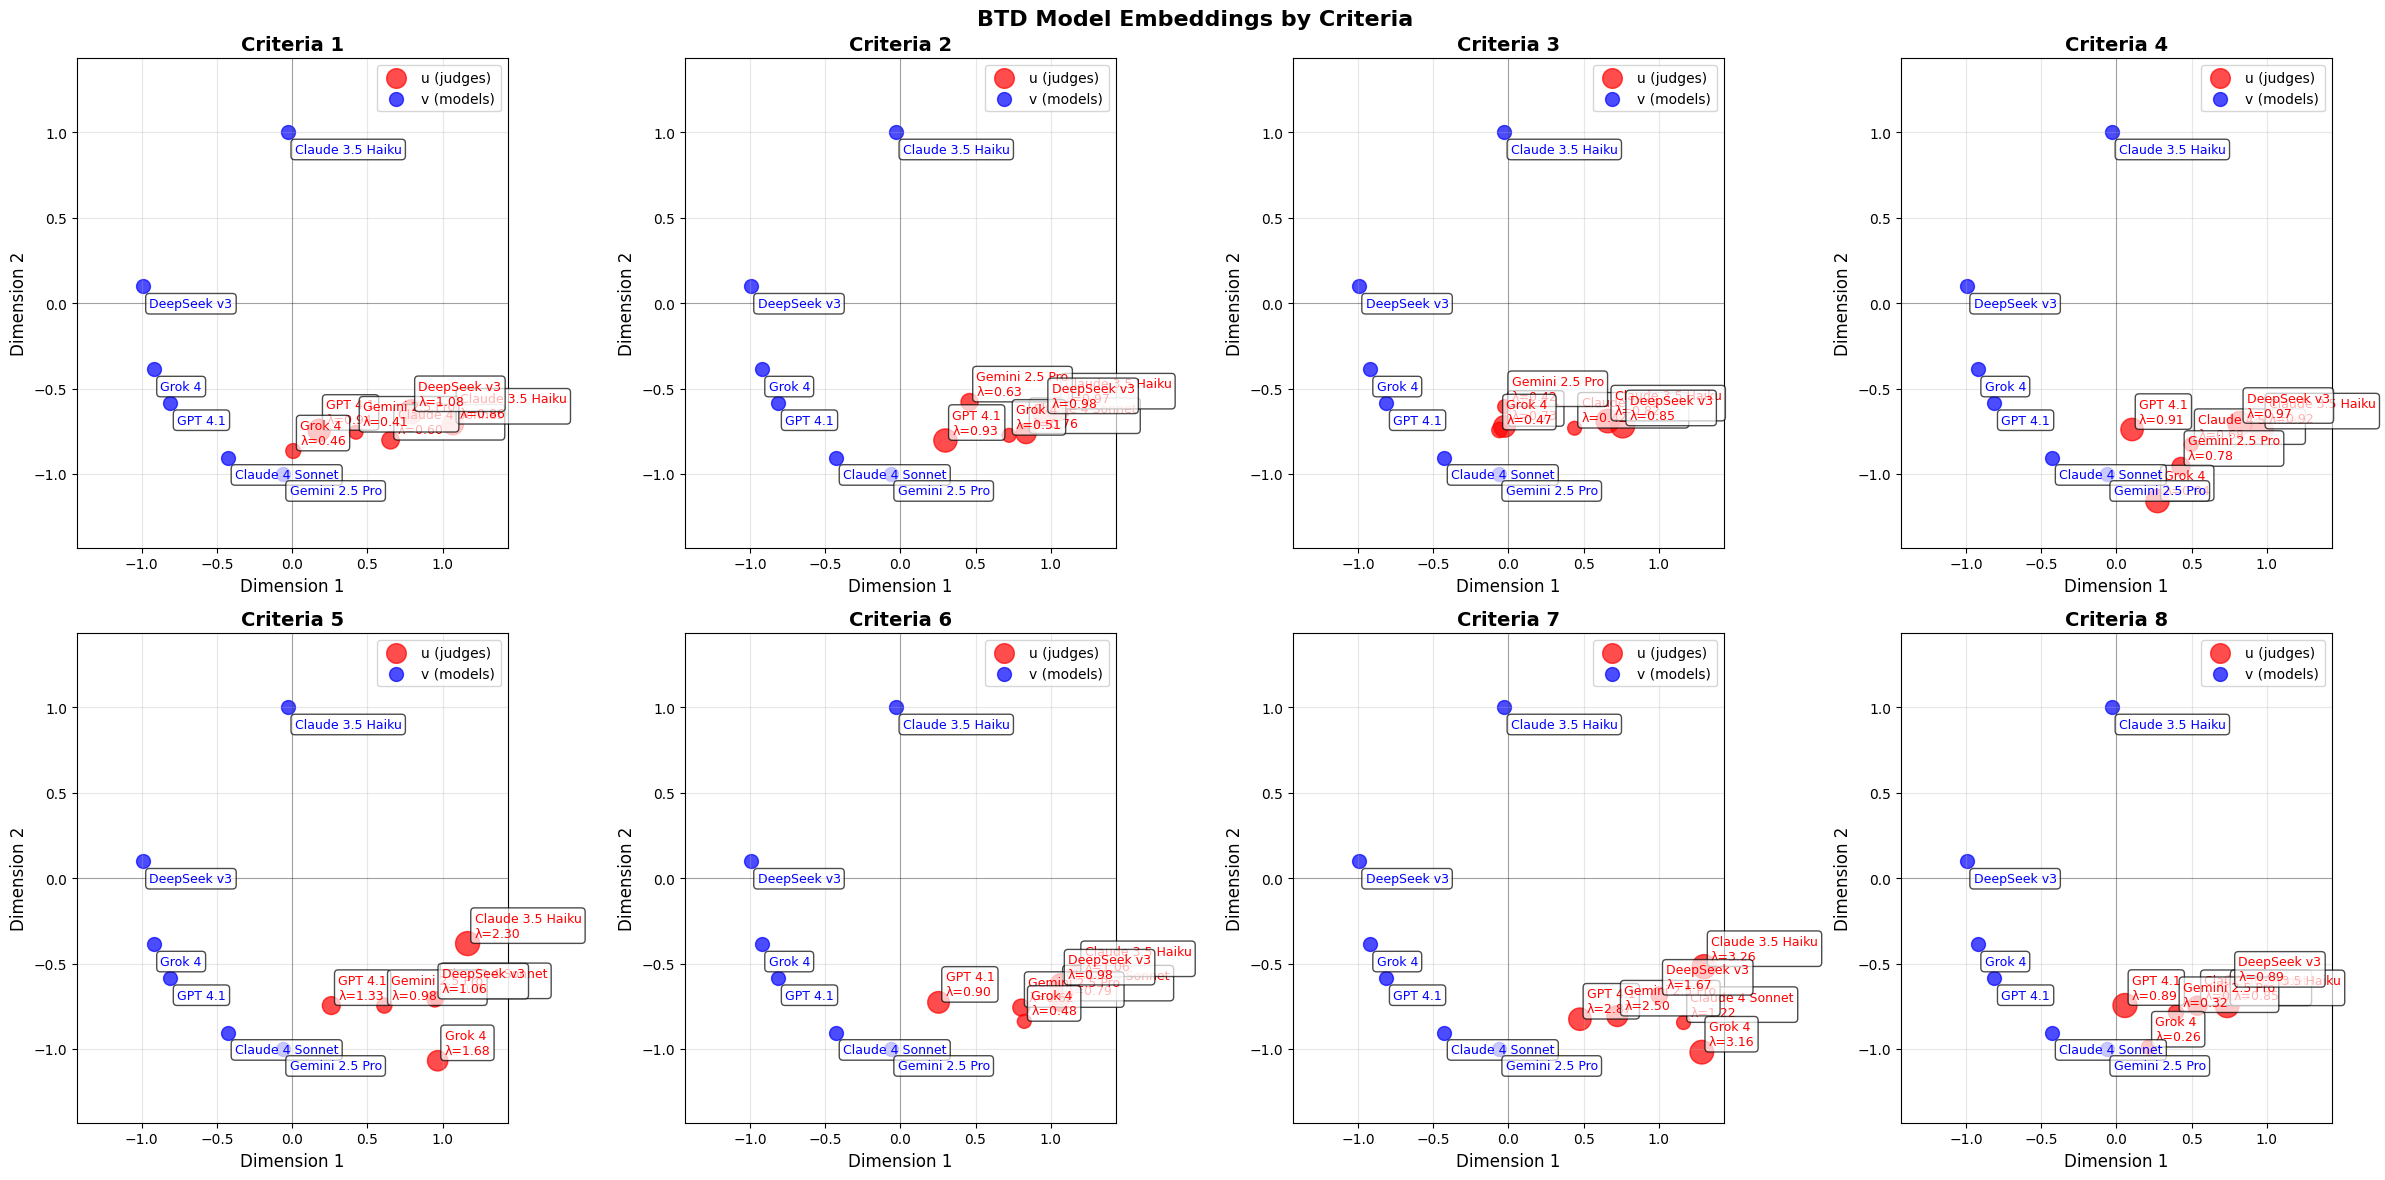

In [97]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from BT_criteria import VectorBTD

def load_vector_btd(path, num_criteria, num_models, d, device='cpu'):
    model = VectorBTD(num_criteria, num_models, d).to(device)
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    return model

def visualize_btd_by_criteria(model, model_names, num_criteria, criteria_names=None, figsize=(24,12)):
    """
    Visualize BTD model embeddings separated by criteria
    Creates one subplot for each criteria
    
    Args:
        model: BTD model
        model_names: List of model names
        num_criteria: Number of criteria
        criteria_names: Optional list of criteria names
        figsize: Figure size tuple
    """
    with torch.no_grad():
        u = model.u.weight.cpu().numpy()  # Shape: (25, 2) for 5 criteria × 5 models
        v = model.v.weight.cpu().numpy()  # Shape: (5, 2) - model embeddings
        log_lambda = model.log_lambda.weight.cpu().numpy().flatten()  # Shape: (25,)
        lambda_vals = np.exp(log_lambda)  # Convert to actual lambda values
    
    num_models = len(model_names)
    
    fig, axes = plt.subplots(2, 4, figsize=figsize)
    axes = axes.flatten()
    
    # Calculate global ranges for consistent scaling across all plots
    all_coords = np.concatenate([u, v], axis=0)
    max_range = np.max(np.abs(all_coords)) * 1.1
    
    # Generate default criteria names if not provided
    if criteria_names is None:
        criteria_names = [f'Criteria {i+1}' for i in range(num_criteria)]
    
    for criteria_idx in range(num_criteria):
        ax = axes[criteria_idx]
        
        # Extract u and lambda for this criteria
        start_idx = criteria_idx * num_models
        end_idx = start_idx + num_models
        
        u_criteria = u[start_idx:end_idx]  # Shape: (5, 2)
        lambda_criteria = lambda_vals[start_idx:end_idx]  # Shape: (5,)
        
        # Use lambda values to determine judge point sizes (tie propensity)
        base_size = 100
        max_lambda_criteria = np.max(lambda_criteria)
        min_lambda_criteria = np.min(lambda_criteria)
        
        # Normalize lambda values for size scaling within this criteria
        if max_lambda_criteria > min_lambda_criteria:
            size_scale = (lambda_criteria - min_lambda_criteria) / (max_lambda_criteria - min_lambda_criteria)
        else:
            size_scale = np.ones_like(lambda_criteria)
        
        u_sizes = base_size + size_scale * 200  # Size range: 100-300
        v_sizes = 100  # Fixed size for model embeddings
        
        # Plot judge embeddings for this criteria (red)
        ax.scatter(u_criteria[:, 0], u_criteria[:, 1], c='red', alpha=0.7, s=u_sizes, label='u (judges)')
        # Plot model embeddings (blue) - same for all criteria
        ax.scatter(v[:, 0], v[:, 1], c='blue', alpha=0.7, s=v_sizes, label='v (models)')
        
        # Annotations for judges (red)
        for i in range(num_models):
            ax.annotate(f'{model_names[i]}\nλ={lambda_criteria[i]:.2f}', 
                        (u_criteria[i, 0], u_criteria[i, 1]), xytext=(5, 5), 
                        textcoords='offset points', fontsize=9, color='red',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
        
        # Annotations for models (blue)
        for i in range(num_models):
            ax.annotate(model_names[i], (v[i, 0], v[i, 1]), xytext=(5, -15), 
                        textcoords='offset points', fontsize=9, color='blue',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
        
        ax.set_title(f'{criteria_names[criteria_idx]}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Dimension 1', fontsize=12)
        ax.set_ylabel('Dimension 2', fontsize=12)
        
        # Consistent scaling across all plots
        ax.set_xlim(-max_range, max_range)
        ax.set_ylim(-max_range, max_range)
        
        # Add origin lines
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
        ax.axvline(x=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
        
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=10, loc='upper right')
    
    # Hide the last subplot if we have 5 criteria (2x3 grid)
    if num_criteria < len(axes):
        axes[-1].set_visible(False)
    
    plt.suptitle('BTD Model Embeddings by Criteria', fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    return fig

# Usage example:
if __name__ == "__main__":
    # Your existing setup
    path = f'transcript/20250726_000000/unit btd d2 criteria/'
    d = 2
    model_path = path + 'model.pt'
    num_models = 6
    num_criteria = 8
    
    model_names = [
        "GPT 4.1 Mini (corporate)", 
        "GPT 4.1 Mini (taoist)", 
        "GPT 4.1 Mini (greenbeard)", 
        "GPT 4.1 Mini 1", 
        "GPT 4.1 Mini 2"
    ]

    model_names = ["Claude 4 Sonnet", "Claude 3.5 Haiku", "GPT 4.1", "Gemini 2.5 Pro", "Grok 4", "DeepSeek v3"]

    
    # Optional: define criteria names
    criteria_names = [
        "Criteria 1",
        "Criteria 2", 
        "Criteria 3",
        "Criteria 4",
        "Criteria 5",
        "Criteria 6",
        "Criteria 7",
        "Criteria 8",
    ]
    
    # Load model (you'll need to define VectorBTD class)
    model = load_vector_btd(model_path, num_criteria, num_models, d)
    
    # Create the visualization
    fig = visualize_btd_by_criteria(model, model_names, num_criteria, criteria_names)
    plt.show()

## Visualizing 20 models

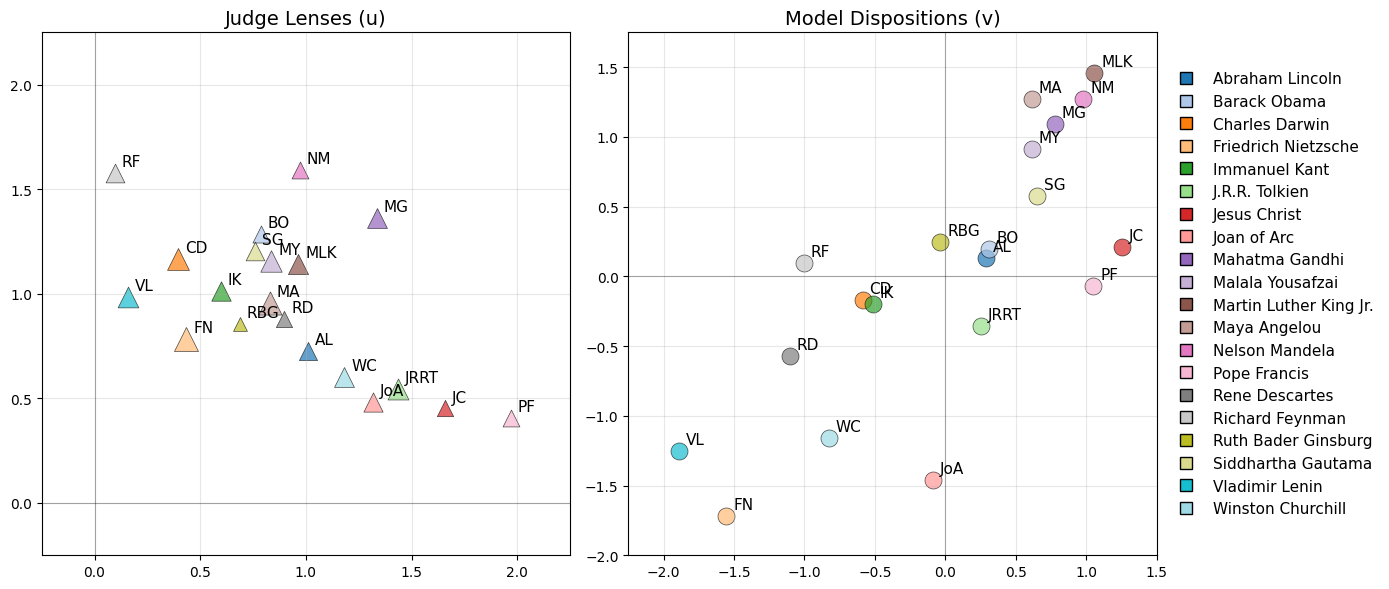

In [21]:
def visualize_btd_side_by_side(model, model_names, figsize=(14,6)):
    """
    Visualize BTD model embeddings with u's and v's in separate side-by-side plots
    Left plot: u's (judges), Right plot: v's (models)
    Colors are assigned AFTER alphabetizing names, so the legend and points follow a smooth spectrum.
    """
    with torch.no_grad():
        u = model.u.weight.cpu().numpy()
        v = model.v.weight.cpu().numpy()
        log_lambda = model.log_lambda.weight.cpu().numpy().flatten()
        lambda_vals = np.exp(log_lambda)

    # PCA if needed
    # embedding_dim = u.shape[1]
    # if embedding_dim > 2:
    #     all_embeddings = np.vstack([u, v])
    #     pca = PCA(n_components=2)
    #     all_2d = pca.fit_transform(all_embeddings)
    #     u = all_2d[:len(u)]
    #     v = all_2d[len(u):]

    # -------------------------------
    # 1. Sort names alphabetically
    # -------------------------------
    ### CHANGED
    sorted_indices = np.argsort(model_names)
    sorted_names = [model_names[i] for i in sorted_indices]

    # -------------------------------
    # 2. Assign colors *after sorting*
    # -------------------------------
    ### CHANGED
    sorted_colors = cm.tab20(np.linspace(0, 1, len(model_names)))

    # Sizes (unchanged)
    base_size = 100
    max_lambda = np.max(lambda_vals)
    min_lambda = np.min(lambda_vals)

    if max_lambda > min_lambda:
        size_scale = (lambda_vals - min_lambda) / (max_lambda - min_lambda)
    else:
        size_scale = np.ones_like(lambda_vals)

    u_sizes = base_size + (1 - size_scale) * 200
    v_sizes = 150

    # Extract initials
    initials = [get_initials(name) for name in model_names]

    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # -------------------------------
    # 3. Plot using sorted indexing + sorted colors
    # -------------------------------
    ### CHANGED
    # Plot u's
    for new_i, old_i in enumerate(sorted_indices):
        ax1.scatter(
            u[old_i, 0], u[old_i, 1],
            c=[sorted_colors[new_i]],
            alpha=0.7, s=u_sizes[old_i],
            marker='^', edgecolors='black', linewidth=0.5
        )
        ax1.annotate(
            initials[old_i],
            (u[old_i, 0], u[old_i, 1]),
            xytext=(5, 5), textcoords='offset points',
            fontsize=11, color='black'
        )

    # Plot v's
    for new_i, old_i in enumerate(sorted_indices):
        ax2.scatter(
            v[old_i, 0], v[old_i, 1],
            c=[sorted_colors[new_i]],
            alpha=0.7, s=v_sizes,
            marker='o', edgecolors='black', linewidth=0.5
        )
        ax2.annotate(
            initials[old_i],
            (v[old_i, 0], v[old_i, 1]),
            xytext=(5, 5), textcoords='offset points',
            fontsize=11, color='black'
        )

    # Aesthetics
    ax1.set_title("Judge Lenses (u)", fontsize=14)
    ax2.set_title("Model Dispositions (v)", fontsize=14)

    ax1.set_xlim(-.25, 2.25)
    ax1.set_ylim(-.25, 2.25)

    ax2.set_xlim(-2.25, 1.5)
    ax2.set_ylim(-2, 1.75)

    for ax in (ax1, ax2):
        ax.axhline(0, color='black', alpha=0.3, linewidth=0.8)
        ax.axvline(0, color='black', alpha=0.3, linewidth=0.8)
        ax.grid(True, alpha=0.3)

    # -------------------------------
    # 4. Build legend with sorted colors + sorted names
    # -------------------------------
    ### CHANGED
    legend_elements = []
    from matplotlib.lines import Line2D
    for i, name in enumerate(sorted_names):
        legend_elements.append(
            Line2D(
                [0], [0], marker='s', color='w',
                markerfacecolor=sorted_colors[i],
                markeredgecolor='black',
                markersize=8, label=name,
                linestyle='None'
            )
        )

    ax2.legend(
        handles=legend_elements,
        fontsize=11,
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        frameon=False
    )

    plt.tight_layout()
    return fig

path = f'transcript/20250728_100000/btd d2/'
d = 2
model_path = path + 'model.pt'
num_models = 20
num_criteria = 1

model_names = [
    'Jesus Christ', 'Malala Yousafzai', 'Pope Francis', 'Barack Obama',
    'Mahatma Gandhi', 'Winston Churchill', 'Siddhartha Gautama',
    'Richard Feynman', 'Charles Darwin', 'Friedrich Nietzsche',
    'Ruth Bader Ginsburg', 'Immanuel Kant', 'Vladimir Lenin',
    'Maya Angelou', 'Abraham Lincoln', 'Joan of Arc', 'Rene Descartes',
    'Nelson Mandela', 'Martin Luther King Jr.', 'J.R.R. Tolkien'
]

model = load_vector_btd(model_path, num_criteria, num_models, d)

fig = visualize_btd_side_by_side(model, model_names)
plt.savefig('figure.png', dpi=500)
plt.show()

## Visualizing 5x5 models

In [ ]:
inv_func = {
    0: '(0, 0)',
    1: '(0, 1)',
    2: '(0, 2)',
    3: '(0, 3)',
    4: '(0, 4)',
    5: '(1, 0)',
    6: '(1, 1)',
    7: '(1, 2)',
    8: '(1, 3)',
    9: '(1, 4)',
    10: '(2, 0)',
    11: '(2, 1)',
    12: '(2, 2)',
    13: '(2, 3)',
    14: '(2, 4)',
    15: '(3, 0)',
    16: '(3, 1)',
    17: '(3, 2)',
    18: '(3, 3)',
    19: '(3, 4)',
    20: '(4, 0)',
    21: '(4, 1)',
    22: '(4, 2)',
    23: '(4, 3)',
    24: '(4, 4)',
}
models = ["Claude 3 Haiku", "Claude 3.5 Haiku", "GPT 4o Mini", "GPT 4.1 Nano", "Gemini 2.0 Flash"]
models = ["Claude 4 Sonnet", "GPT 4.1", "Gemini 2.5 Pro", "Grok 4", "DeepSeek v3"]

personas = ["Neutral", "Utilitarian", "Taoist", "Empathetic", "Corporate"]


2.2633219 0.34703216


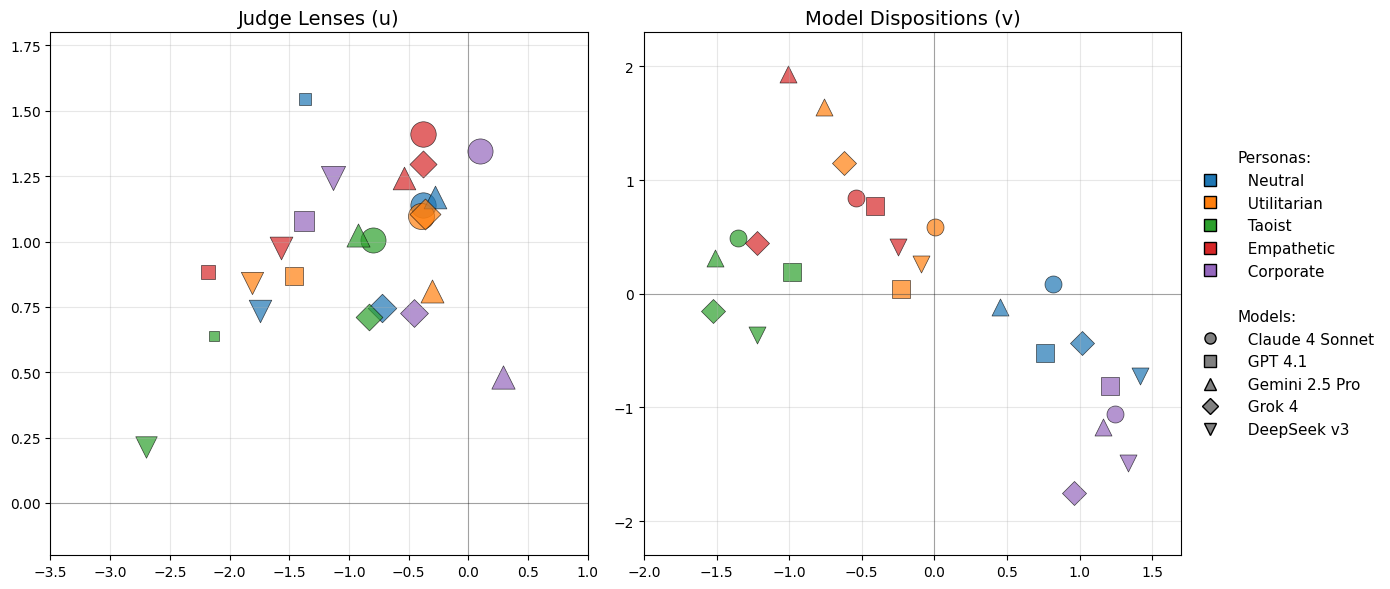

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.cm as cm
from BT_criteria import VectorBTD
import matplotlib.patheffects as patheffects
from sklearn.decomposition import PCA

def load_vector_btd(path, num_criteria, num_models, d, device='cpu'):
    model = VectorBTD(num_criteria, num_models, d).to(device)
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    return model

def parse_model_name(model_name):
    """Extract model type and persona from model name"""
    # Extract persona (the part in parentheses)
    persona = model_name.split('(')[1].split(')')[0]
    
    # Extract model type (the part before the first parenthesis)
    model_type = model_name.split('(')[0].strip()
    
    return model_type, persona

def get_persona_color(persona):
    """Map persona to color"""
    persona_colors = {
        'neutral': '#1f77b4',      # Blue
        'utilitarian': '#ff7f0e',  # Orange  
        'taoist': '#2ca02c',       # Green
        'empathetic': '#d62728',   # Red
        'corporate': '#9467bd'     # Purple
    }
    return persona_colors.get(persona, '#000000')  # Default to black if not found

def get_model_shape(model_type):
    """Map model type to marker shape"""
    model_shapes = {
        'Claude 4 Sonnet': 'o',      # Circle
        'GPT 4.1': 's',              # Square
        'Gemini 2.5 Pro': '^',       # Triangle up
        'Grok 4': 'D',               # Diamond
        'DeepSeek v3': 'v'           # Triangle down
    }
    return model_shapes.get(model_type, 'o')  # Default to circle if not found

def visualize_btd_side_by_side(model, model_names, figsize=(14,6)):
    """
    Visualize BTD model embeddings with u's and v's in separate side-by-side plots
    Left plot: u's (judges), Right plot: v's (models)
    Uses persona-based colors and model-type-based shapes
    Size is inversely proportional to lambda (larger triangle = lower lambda)
    """
    with torch.no_grad():
        u = model.u.weight.cpu().numpy()
        v = model.v.weight.cpu().numpy()
        log_lambda = model.log_lambda.weight.cpu().numpy().flatten()
        lambda_vals = np.exp(log_lambda)  # Convert to actual lambda values

    # if True:
    #     # Combine all embeddings for PCA
    #     all_embeddings = np.vstack([u, v])
        
    #     # Fit PCA on all embeddings
    #     pca = PCA(n_components=2)
    #     all_2d = pca.fit_transform(all_embeddings)
        
    #     # Get variance explained by each component
    #     variance_explained = pca.explained_variance_ratio_
        
    #     # Split back into u and v
    #     u_2d = all_2d[:len(u)]
    #     v_2d = all_2d[len(u):]
        
    #     u = u_2d
    #     v = v_2d
    #     pca_applied = True
        
    #     print(f"PC1 explains {variance_explained[0]:.1%} of variance")
    #     print(f"PC2 explains {variance_explained[1]:.1%} of variance")
    #     print(f"Total variance captured: {np.sum(variance_explained):.1%}")

    # Parse model names to get personas and model types
    parsed_models = [parse_model_name(name) for name in model_names]
    
    # Create side-by-side subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Use lambda values to determine judge point sizes (tie propensity)
    # Make size INVERSELY proportional to lambda (larger triangle = lower lambda)
    base_size = 50
    max_lambda = np.max(lambda_vals)
    min_lambda = np.min(lambda_vals)

    print(max_lambda, min_lambda)
    
    # Normalize lambda values for size scaling
    if max_lambda > min_lambda:
        size_scale = (lambda_vals - min_lambda) / (max_lambda - min_lambda)
    else:
        size_scale = np.ones_like(lambda_vals)
    
    u_sizes = base_size + (1 - size_scale) * 300 # Inverse: larger lambda = smaller size
    v_sizes = 150  # Fixed size for model embeddings

    # Plot u's (judges) on the left subplot
    for i in range(len(u)):
        if i < len(model_names):
            model_type, persona = parsed_models[i]
            color = get_persona_color(persona)
            shape = get_model_shape(model_type)
            
            ax1.scatter(u[i, 0], u[i, 1], c=color, alpha=0.7, s=u_sizes[i], 
                       marker=shape, edgecolors='black', linewidth=0.5)
            # Add labels for judges
            # ax1.annotate(model_names[i], 
            #             (u[i, 0], u[i, 1]), xytext=(5, 5), 
            #             textcoords='offset points', fontsize=9, 
            #             color='black')
    
    # Plot v's (models) on the right subplot
    for i in range(len(v)):
        if i < len(model_names):
            model_type, persona = parsed_models[i]
            color = get_persona_color(persona)
            shape = get_model_shape(model_type)
            
            ax2.scatter(v[i, 0], v[i, 1], c=color, alpha=0.7, s=v_sizes, 
                       marker=shape, edgecolors='black', linewidth=0.5)
            # Add labels for models
            # ax2.annotate(model_names[i], 
            #             (v[i, 0], v[i, 1]), xytext=(5, 5), 
            #             textcoords='offset points', fontsize=9, 
            #             color='black')
    
    # Configure left subplot (u's - judges)
    ax1.set_title('Judge Lenses (u)', fontsize=14)
    
    # Configure right subplot (v's - models)
    ax2.set_title('Model Dispositions (v)', fontsize=14)
    
    # Set consistent axis limits for both subplots
    u_max_range = np.max(np.abs(u)) * 1.1
    v_max_range = np.max(np.abs(v)) * 1.1

    ax1.set_xlim(-3.5, 1)
    ax1.set_ylim(-.2, 1.8)

    ax2.set_xlim(-2, 1.7)
    ax2.set_ylim(-2.3, 2.3)    
    
    # ax1.set_xlim(-u_max_range, u_max_range)
    # ax1.set_ylim(-u_max_range, u_max_range)

    # ax2.set_xlim(-v_max_range, v_max_range)
    # ax2.set_ylim(-v_max_range, v_max_range)
    
    for ax in [ax1, ax2]:
        # Add origin lines
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
        ax.axvline(x=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
        ax.grid(True, alpha=0.3)
    
    # Create custom legend
    from matplotlib.lines import Line2D
    legend_elements = []
    
    # Add persona color legend
    legend_elements.append(Line2D([0], [0], color='w', label='Personas:', linestyle='None', markersize=0))
    personas = ['neutral', 'utilitarian', 'taoist', 'empathetic', 'corporate']
    for persona in personas:
        color = get_persona_color(persona)
        legend_elements.append(Line2D([0], [0], marker='s', color='w', 
                                     markerfacecolor=color, markeredgecolor='black',
                                     markersize=8, label=f'  {persona.capitalize()}', linestyle='None'))
    
    # Add separator
    legend_elements.append(Line2D([0], [0], color='w', label='', linestyle='None', markersize=0))
    
    # Add model type shape legend
    legend_elements.append(Line2D([0], [0], color='w', label='Models:', linestyle='None', markersize=0))
    model_types = ['Claude 4 Sonnet', 'GPT 4.1', 'Gemini 2.5 Pro', 'Grok 4', 'DeepSeek v3']
    for model_type in model_types:
        shape = get_model_shape(model_type)
        legend_elements.append(Line2D([0], [0], marker=shape, color='w', 
                                     markerfacecolor='gray', markeredgecolor='black',
                                     markersize=8, label=f'  {model_type}', linestyle='None'))
    
    # Place legend outside the right subplot
    ax2.legend(handles=legend_elements, fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

    plt.tight_layout()
    
    return fig

# Usage example:
path = f'transcript/20250729_000000/bunch of runs/btd d2/'
d = 2
model_path = path + 'model.pt'
num_models = 25  # Updated for 25 models
num_criteria = 1

# Define your 25 model names
model_names = ["Claude 4 Sonnet (neutral)","Claude 4 Sonnet (utilitarian)","Claude 4 Sonnet (taoist)","Claude 4 Sonnet (empathetic)","Claude 4 Sonnet (corporate)","GPT 4.1 (neutral)","GPT 4.1 (utilitarian)","GPT 4.1 (taoist)","GPT 4.1 (empathetic)","GPT 4.1 (corporate)","Gemini 2.5 Pro (neutral)","Gemini 2.5 Pro (utilitarian)","Gemini 2.5 Pro (taoist)","Gemini 2.5 Pro (empathetic)","Gemini 2.5 Pro (corporate)","Grok 4 (neutral)","Grok 4 (utilitarian)","Grok 4 (taoist)","Grok 4 (empathetic)","Grok 4 (corporate)","DeepSeek v3 (neutral)","DeepSeek v3 (utilitarian)","DeepSeek v3 (taoist)","DeepSeek v3 (empathetic)","DeepSeek v3 (corporate)"]

# Load model and create visualization
model = load_vector_btd(model_path, num_criteria, num_models, d)
fig = visualize_btd_side_by_side(model, model_names)
plt.savefig('figure.png', dpi=500)
plt.show()

In [48]:
# Usage example:
path = f'transcript/20250729_000000/btd d2/'
d = 2
model_path = path + 'model.pt'
num_models = 25  # Updated for 25 models
num_criteria = 1

# Define your 25 model names
model_names = ["Claude 4 Sonnet (neutral)","Claude 4 Sonnet (utilitarian)","Claude 4 Sonnet (taoist)","Claude 4 Sonnet (empathetic)","Claude 4 Sonnet (corporate)","GPT 4.1 (neutral)","GPT 4.1 (utilitarian)","GPT 4.1 (taoist)","GPT 4.1 (empathetic)","GPT 4.1 (corporate)","Gemini 2.5 Pro (neutral)","Gemini 2.5 Pro (utilitarian)","Gemini 2.5 Pro (taoist)","Gemini 2.5 Pro (empathetic)","Gemini 2.5 Pro (corporate)","Grok 4 (neutral)","Grok 4 (utilitarian)","Grok 4 (taoist)","Grok 4 (empathetic)","Grok 4 (corporate)","DeepSeek v3 (neutral)","DeepSeek v3 (utilitarian)","DeepSeek v3 (taoist)","DeepSeek v3 (empathetic)","DeepSeek v3 (corporate)"]

# Load model and create visualization
model = load_vector_btd(model_path, num_criteria, num_models, d)   

with torch.no_grad():
    u = model.u.weight.cpu().numpy()
    v = model.v.weight.cpu().numpy()
    log_lambda = model.log_lambda.weight.cpu().numpy().flatten()
    lambda_vals = np.exp(log_lambda)  # Convert to actual lambda values

In [50]:
lambda_vals.reshape((5,5))

array([[0.45420465, 0.34703216, 0.49576008, 0.43371835, 0.4906294 ],
       [2.1508653 , 1.6197146 , 2.2633219 , 1.950843  , 1.2426752 ],
       [0.86515653, 0.82653743, 0.81261814, 0.87819   , 0.7840243 ],
       [1.2374276 , 0.99398136, 1.3925498 , 1.366971  , 1.2941351 ],
       [0.8958454 , 0.9345269 , 1.0552008 , 0.86301976, 0.6417736 ]],
      dtype=float32)

In [52]:
import seaborn as sns

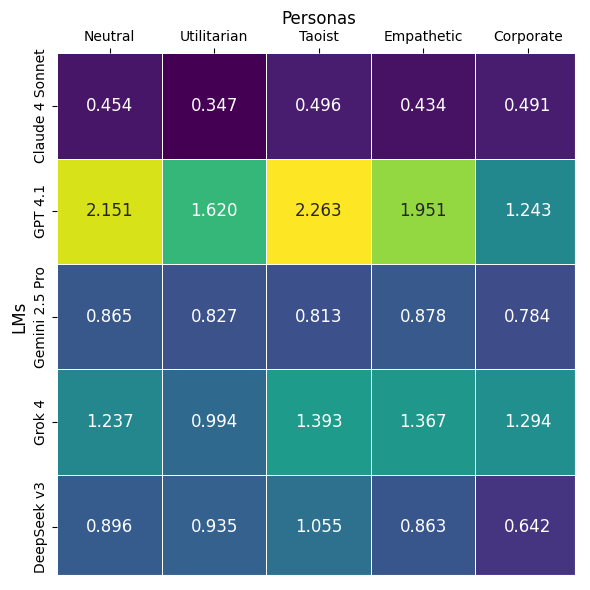

In [57]:


# Create labels
model_labels = ["Claude 4 Sonnet", "GPT 4.1", "Gemini 2.5 Pro", "Grok 4", "DeepSeek v3"]
persona_labels = ["Neutral", "Utilitarian", "Taoist", "Empathetic", "Corporate"]

# Method 2: Heatmap visualization
plt.figure(figsize=(6,6))

# Create the heatmap
ax = sns.heatmap(lambda_vals.reshape((5,5)), 
                 annot=True, 
                 fmt='.3f', 
                 cmap='viridis',
                 annot_kws={'fontsize': 12},
                 xticklabels=persona_labels,
                 yticklabels=model_labels,
                #  cbar_kws={'label': 'Score'},
                cbar=None,
                 linewidths=0.5)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# Highlight the margins with different colors
# Add rectangles to highlight the margin cells
from matplotlib.patches import Rectangle

# Add white lines to separate the means from the main matrix
# Vertical line separating the mean column from the main matrix
ax.axvline(x=5, color='white', linewidth=8)

# Horizontal line separating the mean row from the main matrix  
ax.axhline(y=5, color='white', linewidth=8)

# # Highlight mean column (right edge)
# for i in range(5):
#     rect = Rectangle((5, i), 1, 1, linewidth=4, edgecolor='white', facecolor='none')
#     ax.add_patch(rect)

# # Highlight mean row (bottom edge)  
# for j in range(5):
#     rect = Rectangle((j, 5), 1, 1, linewidth=4, edgecolor='white', facecolor='none')
#     ax.add_patch(rect)

# # Highlight overall mean (bottom-right corner)
# rect = Rectangle((5, 5), 1, 1, linewidth=4, edgecolor='white', facecolor='none')
# ax.add_patch(rect)

# plt.title('LM-Persona Trust Score Matrix')
plt.xlabel('Personas', fontsize=12)
plt.ylabel('LMs', fontsize=12)
plt.tight_layout()
plt.savefig('figure.png', dpi=500)
plt.show()

## Visualizing n models

In [1]:
model_names = \
['Claude 4.5 Sonnet',
  'Claude 4.0 Sonnet',
  'Claude 3.7 Sonnet',
  'Claude 3.5 Sonnet',
  'GPT 5.1',
  'GPT 5',
  'GPT 4.1',
  'GPT 4o',
  'GPT oss 120b',
  'GPT oss 20b',
  'Gemini 3 Pro Preview',
  'Gemini 2.5 Pro',
  'Gemini 2.0 Flash',
  'Grok 4.1 Fast',
  'Grok 4',
  'Grok 3',
  'DeepSeek v3',
  'DeepSeek R1T Chimera',
  'Qwen 3 235B',
  'Qwen 3 80b',
  'Qwen 3 32b',
  'Qwen 2.5 72b',
  'Kimi K2 thinking',
  'Kimi K2 0711',
  'Mistral Nemo',
  'Mistral Small 3.2',
  'Mistral Tiny',
  'Cydonia 24B V4.1',
  # 'Sherlock Think Alpha',
  # 'Sherlock Dash Alpha',
  'Llama 4 Maverick',
  'Llama 4 Scout',
  'Llama 3.3 70b',
  'Nvidia Nemotron Nano',
  'Nvidia Nemotron Nano 12B',
  'Microsoft Phi 4',
  'GLM 4.6',
  'GLM 4.5 Air',
  'Baidu Ernie 4.5']

Original embedding dimension: 2D
Applying PCA to reduce to 2D for visualization...
PC1 explains 63.7% of variance
PC2 explains 36.3% of variance
Total variance captured: 100.0%
4.206523 0.21645916


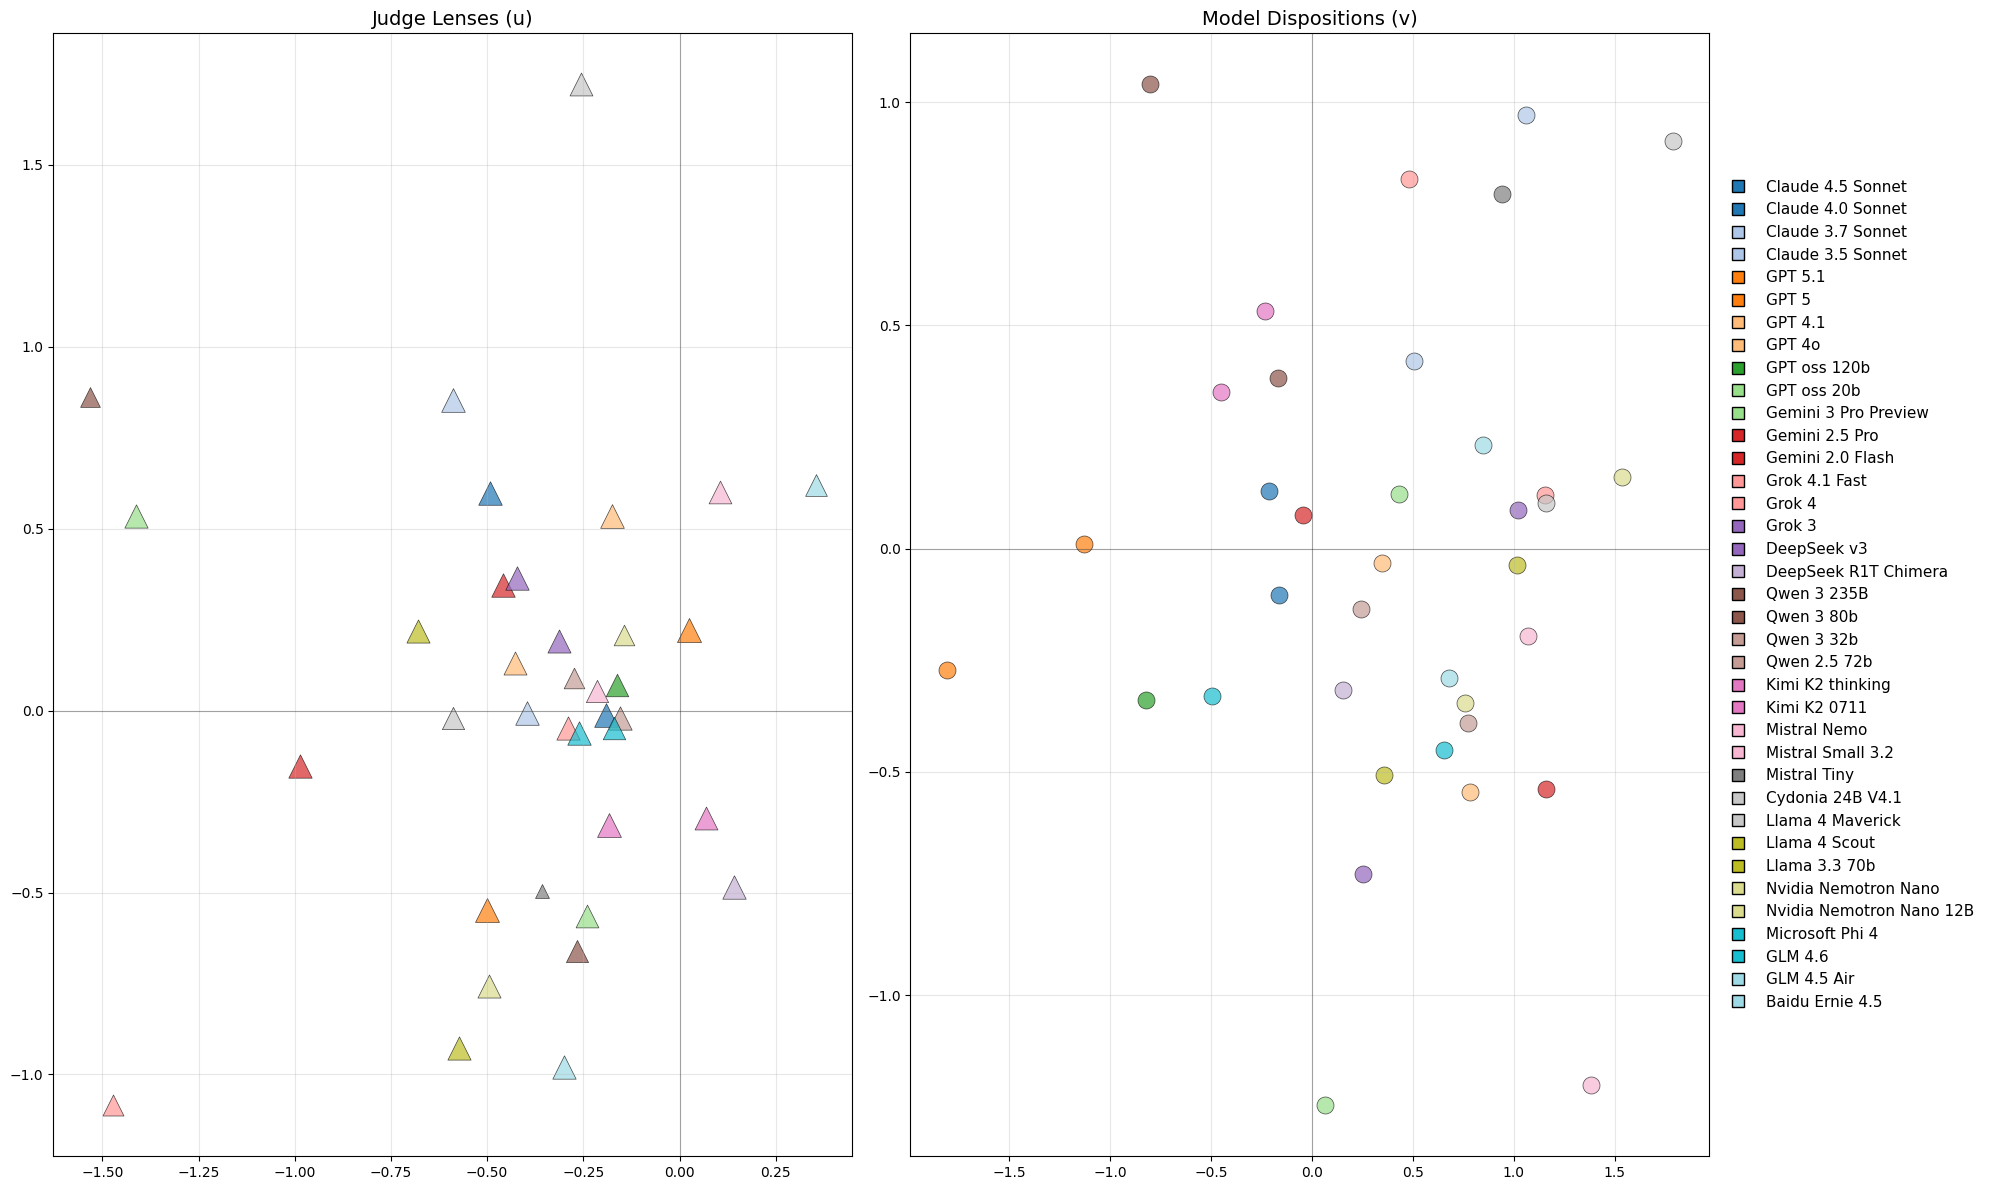

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.cm as cm
from BT_criteria import VectorBTD
import matplotlib.patheffects as patheffects
from sklearn.decomposition import PCA

def load_vector_btd(path, num_criteria, num_models, d, device='cpu'):
    model = VectorBTD(num_criteria, num_models, d).to(device)
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    return model

def visualize_btd_side_by_side(model, model_names, figsize=(20,12)):
    """
    Visualize BTD model embeddings with u's and v's in separate side-by-side plots
    Left plot: u's (judges), Right plot: v's (models)
    Uses different shapes and color coding for all 20 models
    Size is inversely proportional to lambda (larger triangle = lower lambda)
    """
    with torch.no_grad():
        u = model.u.weight.cpu().numpy()
        v = model.v.weight.cpu().numpy()
        log_lambda = model.log_lambda.weight.cpu().numpy().flatten()
        lambda_vals = np.exp(log_lambda)  # Convert to actual lambda values

    # Check if we need PCA (more than 2 dimensions)
    embedding_dim = u.shape[1]
    pca_applied = False
    variance_explained = None
    
    if embedding_dim >= 2:
        print(f"Original embedding dimension: {embedding_dim}D")
        print("Applying PCA to reduce to 2D for visualization...")
        
        # Combine all embeddings for PCA
        all_embeddings = np.vstack([u, v])
        
        # Fit PCA on all embeddings
        pca = PCA(n_components=2)
        all_2d = pca.fit_transform(all_embeddings)
        
        # Get variance explained by each component
        variance_explained = pca.explained_variance_ratio_
        
        # Split back into u and v
        u_2d = all_2d[:len(u)]
        v_2d = all_2d[len(u):]
        
        u = u_2d
        v = v_2d
        pca_applied = True
        
        print(f"PC1 explains {variance_explained[0]:.1%} of variance")
        print(f"PC2 explains {variance_explained[1]:.1%} of variance")
        print(f"Total variance captured: {np.sum(variance_explained):.1%}")
    
    # Create side-by-side subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    

    colors = cm.tab20(np.linspace(0, 1, len(model_names)))
    
    # Use lambda values to determine judge point sizes (tie propensity)
    # Make size INVERSELY proportional to lambda (larger triangle = lower lambda)
    base_size = 100
    max_lambda = np.max(lambda_vals)
    min_lambda = np.min(lambda_vals)

    print(max_lambda, min_lambda)
    
    # Normalize lambda values for size scaling
    if max_lambda > min_lambda:
        size_scale = (lambda_vals - min_lambda) / (max_lambda - min_lambda)
    else:
        size_scale = np.ones_like(lambda_vals)
    
    u_sizes = base_size + (1 - size_scale) * 200  # Inverse: larger lambda = smaller size
    v_sizes = 150  # Fixed size for model embeddings

    # Plot u's (judges) on the left subplot
    for i in range(len(u)):
        if i < len(model_names):
            ax1.scatter(u[i, 0], u[i, 1], c=[colors[i]], alpha=0.7, s=u_sizes[i], 
                       marker='^', edgecolors='black', linewidth=0.5)
            # Add initials labels for judges
            # ax1.annotate(model_names[i], 
            #             (u[i, 0], u[i, 1]), xytext=(5, 5), 
            #             textcoords='offset points', fontsize=11, 
            #             color='black')
            # text.set_path_effects([patheffects.withStroke(linewidth=1, foreground='black')])
    
    # Plot v's (models) on the right subplot
    for i in range(len(v)):
        if i < len(model_names):
            ax2.scatter(v[i, 0], v[i, 1], c=[colors[i]], alpha=0.7, s=v_sizes, 
                       marker='o', edgecolors='black', linewidth=0.5)
            # Add initials labels for models
            # ax2.annotate(model_names[i], 
            #             (v[i, 0], v[i, 1]), xytext=(5, 5), 
            #             textcoords='offset points', fontsize=11, 
            #             color='black')
            # text.set_path_effects([patheffects.withStroke(linewidth=1, foreground='black')])
    
    # Configure left subplot (u's - judges)
    ax1.set_title('Judge Lenses (u)', fontsize=14)
    
    # Configure right subplot (v's - models)
    ax2.set_title('Model Dispositions (v)', fontsize=14)
    
    # Set consistent axis limits for both subplots
    all_coords = np.concatenate([u, v], axis=0)
    u_max_range = np.max(np.abs(u)) * 1.1
    v_max_range = np.max(np.abs(v)) * 1.1

    # ax1.set_xlim(-.25, 1)
    # ax1.set_ylim(-0.75,1)

    # ax2.set_xlim(-2,1)
    # ax2.set_ylim(-0.75,1)

    # ax1.set_xlim(-u_max_range, u_max_range)
    # ax1.set_ylim(-u_max_range, u_max_range)

    # ax2.set_xlim(-v_max_range, v_max_range)
    # ax2.set_ylim(-v_max_range, v_max_range)
    
    for ax in [ax1, ax2]:
        
        # Add origin lines
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
        ax.axvline(x=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
        ax.grid(True, alpha=0.3)
    
    # Create custom legend (shared between both subplots)
    legend_elements = []
    
    # Add shape legend
    from matplotlib.lines import Line2D
    # legend_elements.append(Line2D([0], [0], marker='^', color='w', markerfacecolor='gray', 
    #                              markeredgecolor='black', markersize=10, 
    #                              label='Judge Lenses (u)', linestyle='None'))
    # legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
    #                              markeredgecolor='black', markersize=10, 
    #                              label='Model Dispositions (v)', linestyle='None'))
    
    # Add separator
    # legend_elements.append(Line2D([0], [0], color='w', label='──────────────', linestyle='None'))
    
    # Add model name colors
    for i, model_name in enumerate(model_names):
        legend_elements.append(Line2D([0], [0], marker='s', color='w', 
                                     markerfacecolor=colors[i], markeredgecolor='black',
                                     markersize=8, label=model_name, linestyle='None'))
    
    # Place legend outside the right subplot
    # fig.legend(handles=legend_elements, fontsize=11, bbox_to_anchor=(.24,.90))#, loc='center left', bbox_to_anchor=(1.05, 0.5))
    ax2.legend(handles=legend_elements, fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)

    plt.tight_layout()
    
    return fig

# Usage example:
d = 2
path = f'transcript/20251119_000000/btd runs/btd_d{d}/'
model_path = path + 'model.pt'
num_models = 37  # Updated for 20 models
num_criteria = 1

# Load model and create visualization
model = load_vector_btd(model_path, num_criteria, num_models, d)
fig = visualize_btd_side_by_side(model, model_names)
# plt.savefig('figure.png', dpi=500)
plt.show()

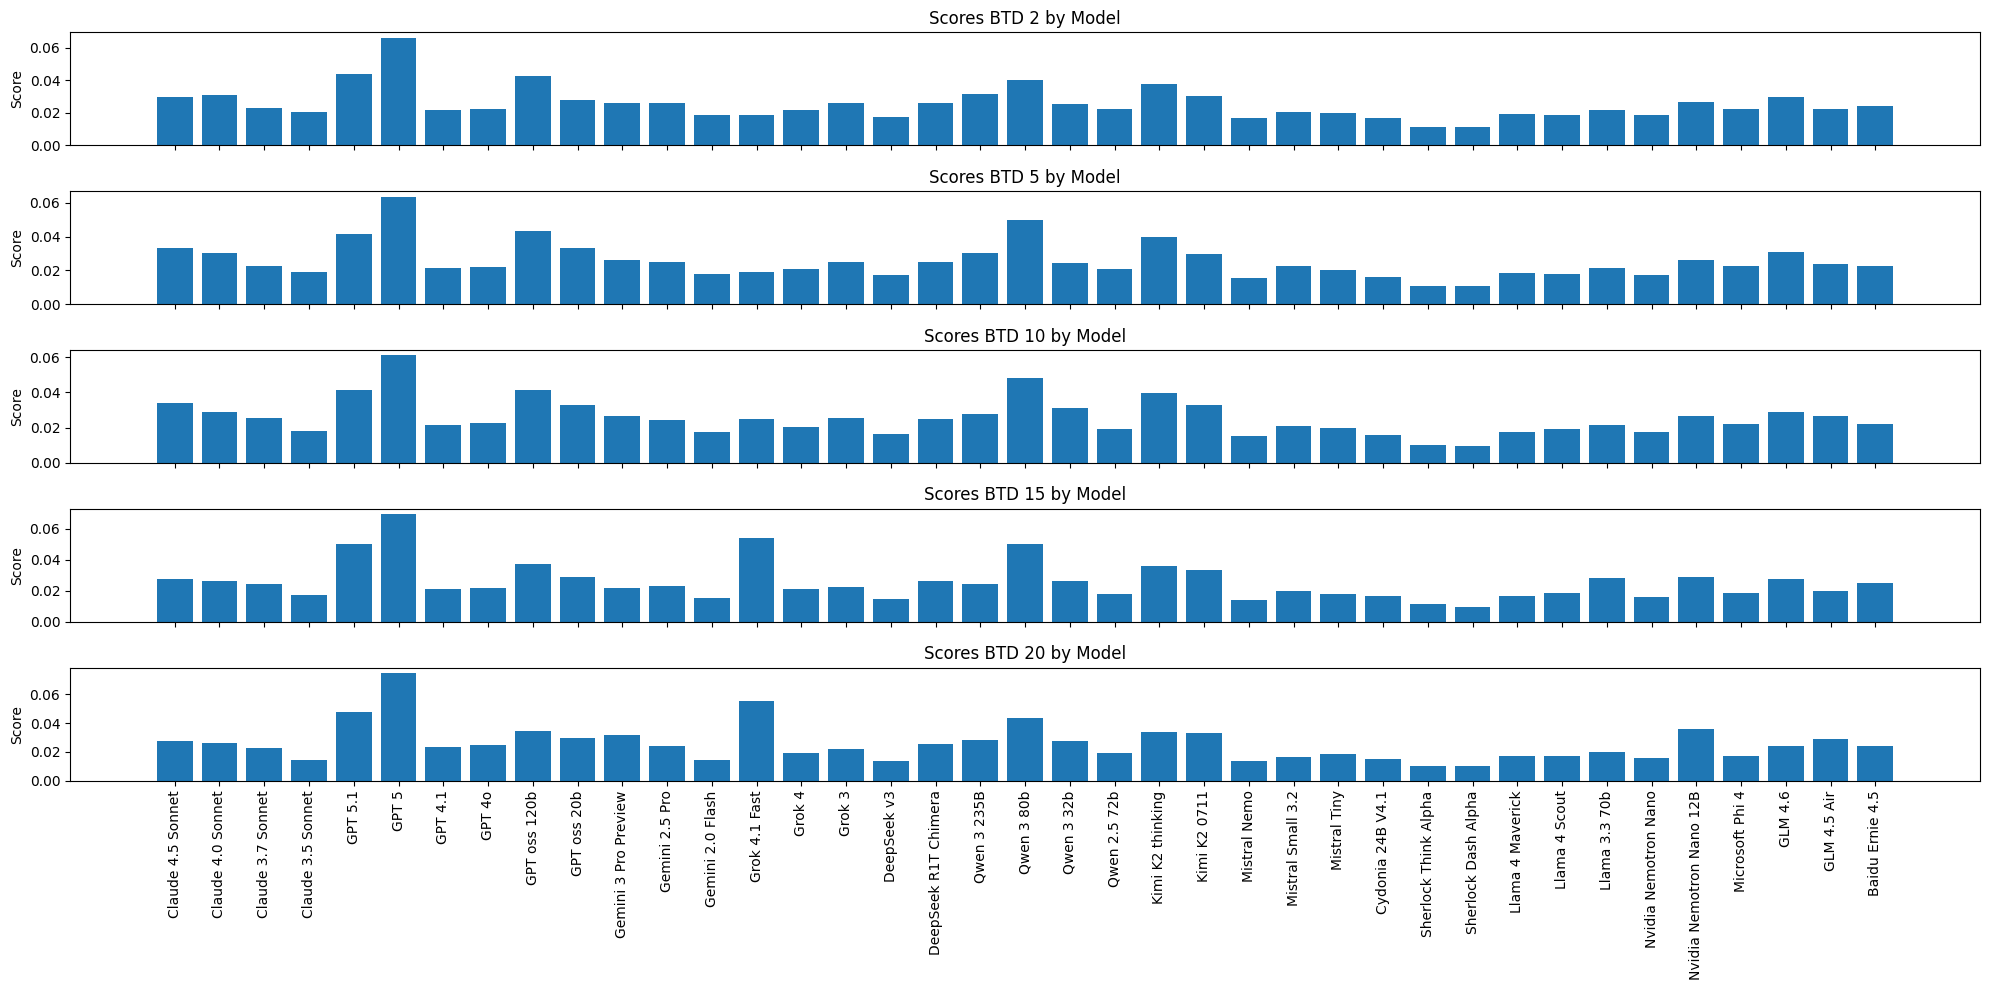

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

scores_1 = [0.0299, 0.0308, 0.0233, 0.0203, 0.0441, 0.0663, 0.0220, 0.0224, 0.0429, 0.0280, 0.0260, 0.0262, 0.0185, 0.0185, 0.0218, 0.0259, 0.0176, 0.0262, 0.0314, 0.0402, 0.0257, 0.0222, 0.0379, 0.0304, 0.0171, 0.0205, 0.0197, 0.0171, 0.0115, 0.0114, 0.0192, 0.0188, 0.0218, 0.0186, 0.0270, 0.0226, 0.0300, 0.0225, 0.0242]

scores_2 = [0.0335, 0.0306, 0.0229, 0.0191, 0.0418, 0.0638, 0.0214, 0.0220, 0.0433, 0.0334, 0.0260, 0.0252, 0.0180, 0.0189, 0.0207, 0.0247, 0.0173, 0.0252, 0.0305, 0.0500, 0.0245, 0.0211, 0.0397, 0.0297, 0.0155, 0.0224, 0.0203, 0.0160, 0.0108, 0.0106, 0.0183, 0.0177, 0.0213, 0.0171, 0.0262, 0.0228, 0.0309, 0.0241, 0.0228]

scores_3 = [0.0339, 0.0289, 0.0256, 0.0180, 0.0415, 0.0610, 0.0213, 0.0226, 0.0412, 0.0330, 0.0269, 0.0245, 0.0173, 0.0247, 0.0202, 0.0255, 0.0166, 0.0247, 0.0278, 0.0484, 0.0309, 0.0193, 0.0397, 0.0328, 0.0154, 0.0210, 0.0196, 0.0160, 0.0100, 0.0094, 0.0176, 0.0194, 0.0214, 0.0176, 0.0264, 0.0222, 0.0291, 0.0265, 0.0221]

scores_4 = [0.0274, 0.0261, 0.0242, 0.0174, 0.0501, 0.0693, 0.0214, 0.0217, 0.0372, 0.0286, 0.0215, 0.0229, 0.0152, 0.0539, 0.0210, 0.0225, 0.0145, 0.0262, 0.0243, 0.0503, 0.0265, 0.0182, 0.0362, 0.0336, 0.0143, 0.0198, 0.0182, 0.0165, 0.0114, 0.0095, 0.0169, 0.0186, 0.0281, 0.0162, 0.0287, 0.0187, 0.0276, 0.0200, 0.0253]

scores_5 = [0.0276, 0.0258, 0.0226, 0.0145, 0.0478, 0.0747, 0.0234, 0.0250, 0.0346, 0.0295, 0.0320, 0.0239, 0.0146, 0.0550, 0.0195, 0.0220, 0.0135, 0.0253, 0.0280, 0.0435, 0.0274, 0.0194, 0.0340, 0.0330, 0.0135, 0.0161, 0.0185, 0.0153, 0.0101, 0.0102, 0.0172, 0.0169, 0.0196, 0.0155, 0.0356, 0.0171, 0.0244, 0.0290, 0.0244]

x = np.arange(len(model_names))

fig, axes = plt.subplots(5, 1, figsize=(20,10), sharex=True)

# --- Top plot: BTD scores ---
axes[0].bar(x, scores_1)
axes[0].set_ylabel("Score")
axes[0].set_title("Scores BTD 2 by Model")

axes[1].bar(x, scores_2)
axes[1].set_ylabel("Score")
axes[1].set_title("Scores BTD 5 by Model")

axes[2].bar(x, scores_3)
axes[2].set_ylabel("Score")
axes[2].set_title("Scores BTD 10 by Model")

axes[3].bar(x, scores_4)
axes[3].set_ylabel("Score")
axes[3].set_title("Scores BTD 15 by Model")

axes[4].bar(x, scores_5)
axes[4].set_ylabel("Score")
axes[4].set_title("Scores BTD 20 by Model")

# x-axis labels only on bottom plot
axes[4].set_xticks(x)
axes[4].set_xticklabels(model_names, rotation=90)

plt.tight_layout()
plt.show()


In [50]:
import json
from data_utils import extract_comparisons_with_ties_criteria, handle_inconsistencies_with_ties_criteria
NUM_CRITERIA = 8
NUM_MODELS = 37

data = []
with open("transcript/20251118_100000/evaluations.jsonl") as f:
    for line in f:
        data.append(json.loads(line))

comparisons, data_cleaned = extract_comparisons_with_ties_criteria(data, num_criteria=NUM_CRITERIA)
comparisons = handle_inconsistencies_with_ties_criteria(comparisons)

Number of comparisons with a null response: 1514
Number of comparisons with an API call error: 611
Number of judge responses without a <criterion> match: 2142
Number of judge responses without a number in the <criterion> match: 0
Number of judge responses with a non-0/1/2 number in the <criterion> match: 0


In [61]:
len(data), len(data_cleaned), len(comparisons)

(10432, 8211, 64314)

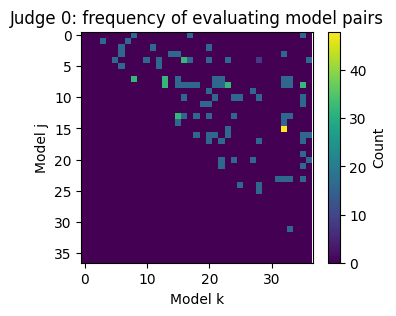

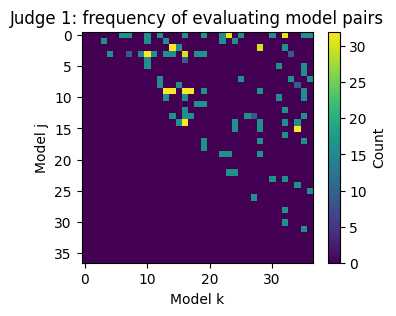

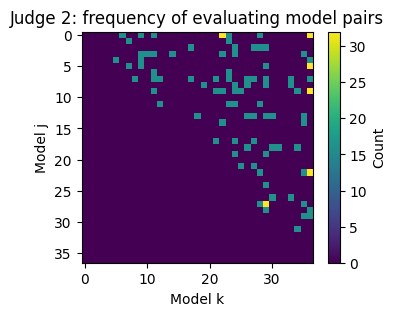

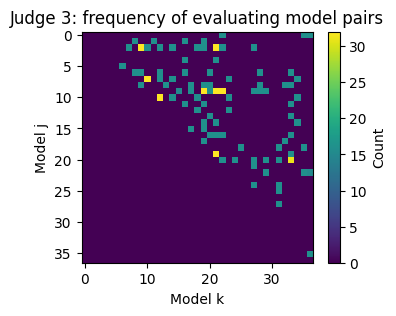

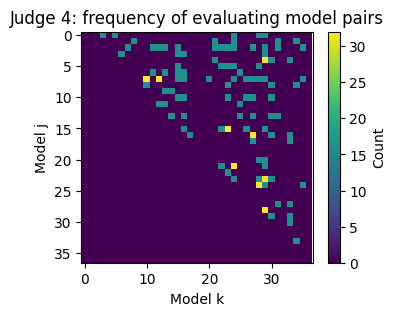

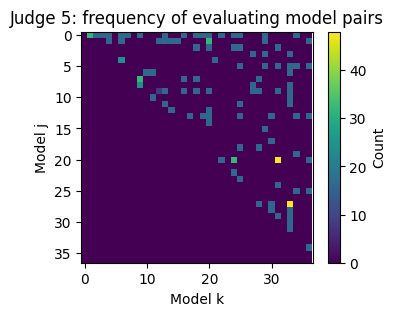

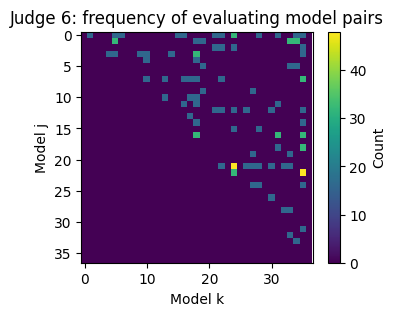

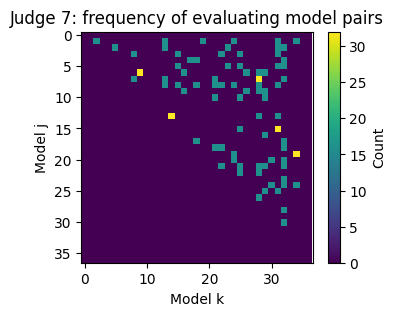

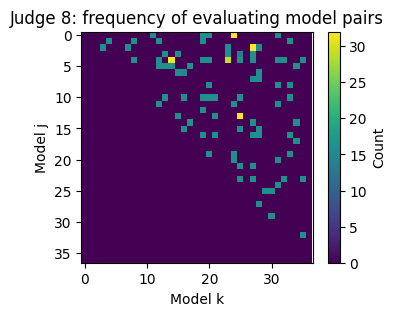

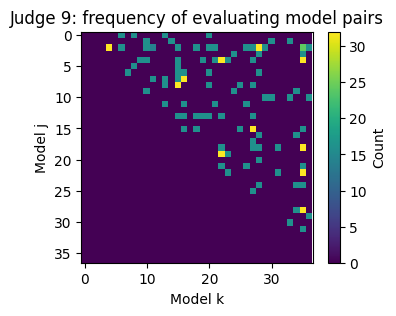

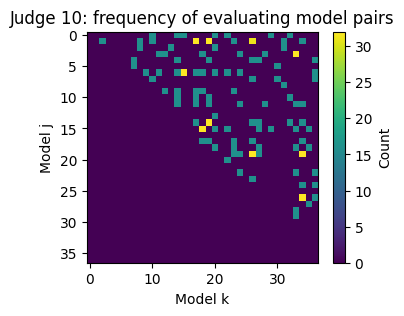

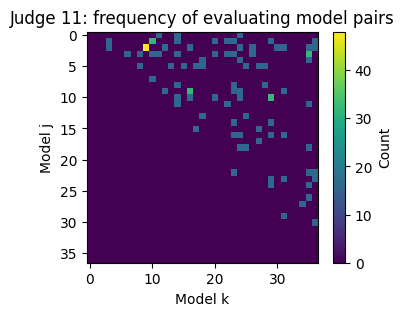

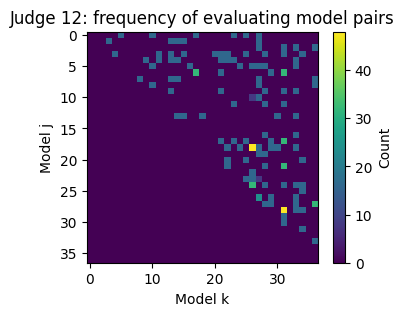

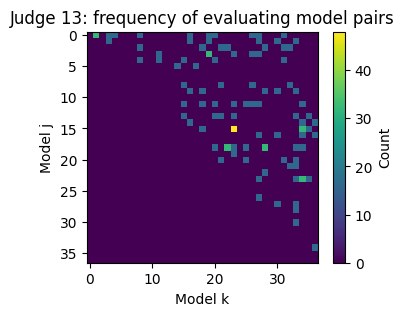

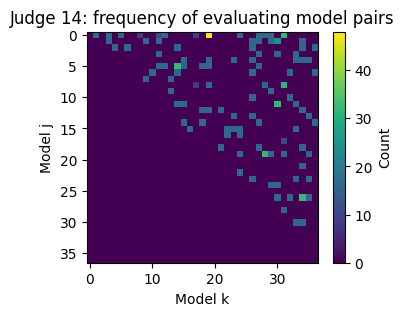

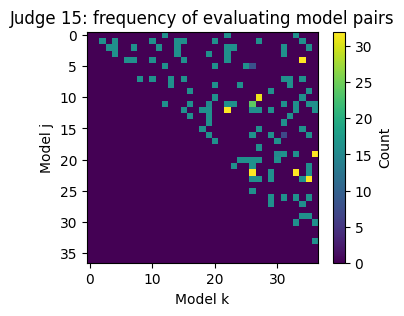

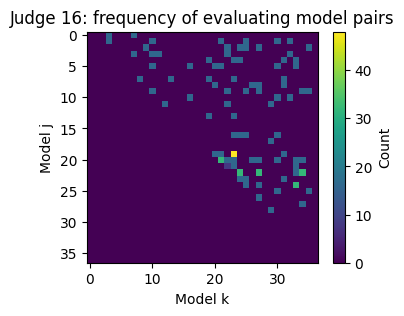

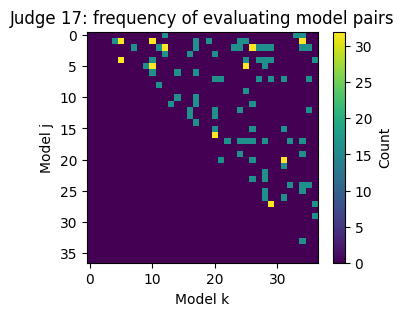

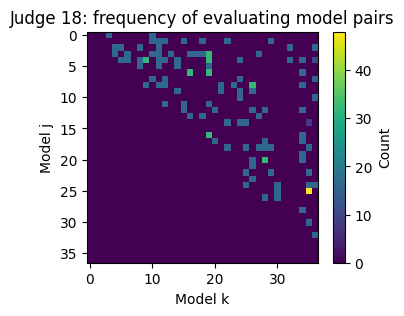

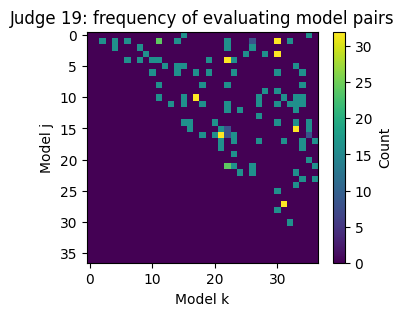

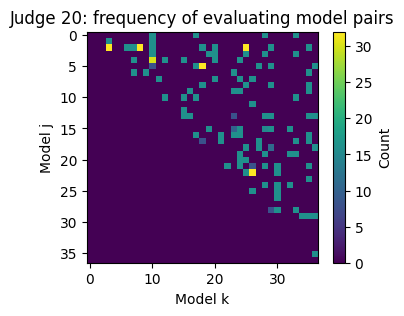

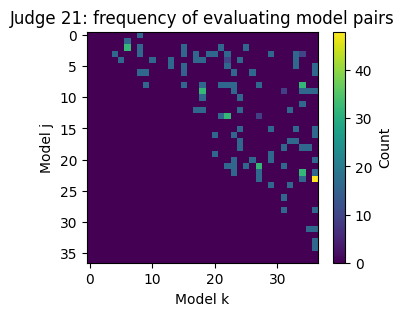

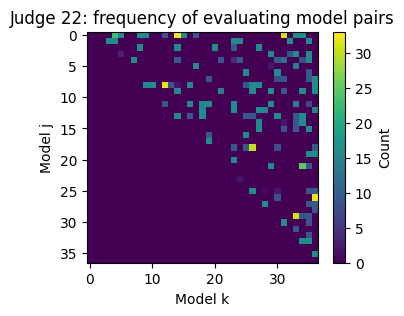

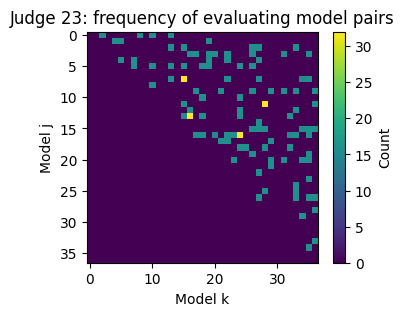

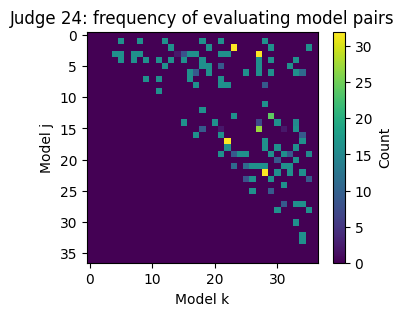

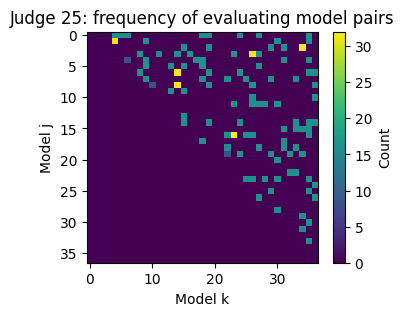

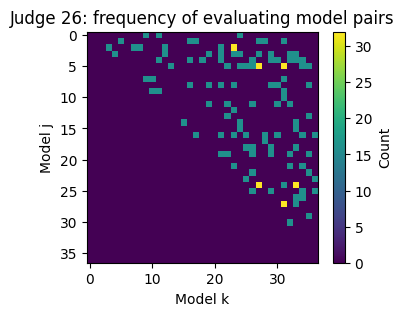

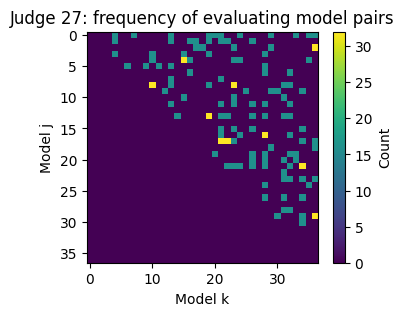

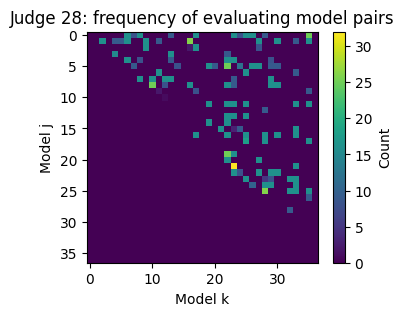

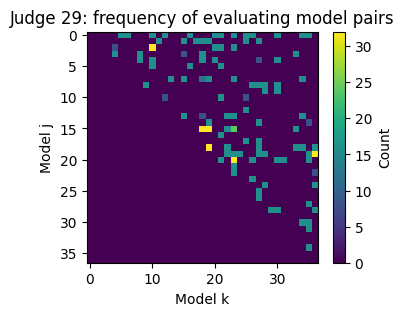

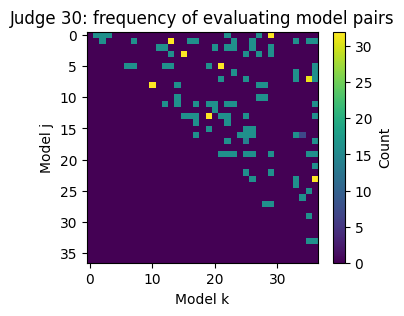

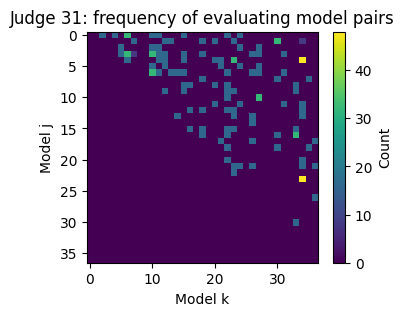

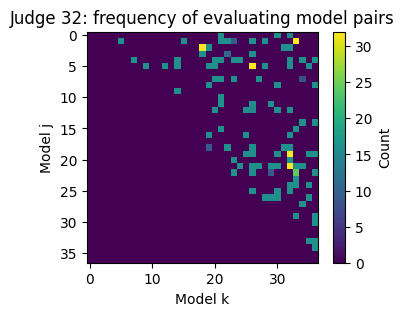

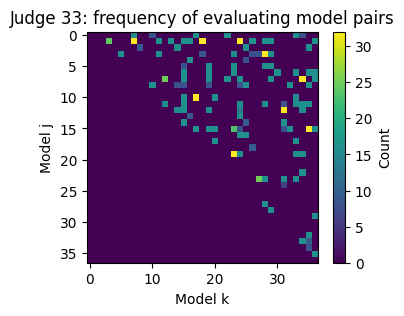

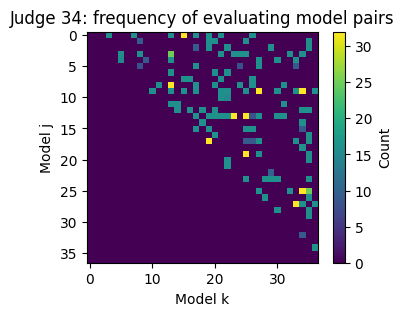

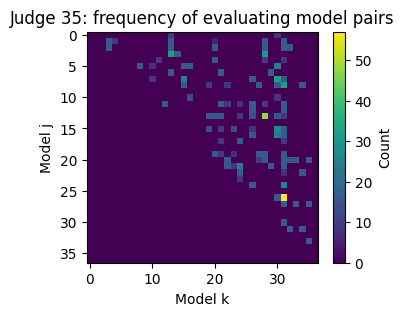

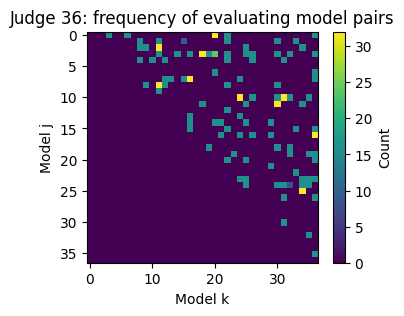

In [52]:
import numpy as np

def build_counts_tensor_unordered(comparisons, num_models=NUM_MODELS):
    """
    Returns T[i,j,k] where (j,k) is unordered: we map (k,j) to (j,k) when k<j.
    """
    T = np.zeros((num_models, num_models, num_models), dtype=int)

    for _, _, judge, e1, e2, _ in comparisons:

        if 0 <= judge < num_models and 0 <= e1 < num_models and 0 <= e2 < num_models:

            # collapse ordering
            j, k = sorted((e1, e2))
            T[judge, j, k] += 1

    return T

import matplotlib.pyplot as plt

def visualize_judge_pair_matrix(T, judge_i, unordered=True):
    """
    Visualize T[judge_i, :, :] as a heatmap.
    If unordered=True, diagonal & lower triangle are zero and safe.
    """

    M = T[judge_i].copy()

    # Block diagonal if unordered
    if unordered:
        for a in range(M.shape[0]):
            M[a,a] = 0
        M = np.triu(M)  # optionally hide the lower triangle

    plt.figure(figsize=(4,3))
    plt.imshow(M, cmap='viridis')
    plt.colorbar(label='Count')
    plt.title(f"Judge {judge_i}: frequency of evaluating model pairs")
    plt.xlabel("Model k")
    plt.ylabel("Model j")
    plt.show()

def visualize_judge_model_matrix(T):
    M = T.sum(axis=2)  # sum over eval2 slot

    plt.figure(figsize=(8,6))
    plt.imshow(M, cmap='viridis')
    plt.colorbar(label='Count')
    plt.title("Judge i vs. total evaluations of model j")
    plt.xlabel("Model j")
    plt.ylabel("Judge i")
    plt.show()

    return M

T = build_counts_tensor_unordered(comparisons, num_models=NUM_MODELS)
for i in range(NUM_MODELS):
    visualize_judge_pair_matrix(T, judge_i=i)
# visualize_judge_model_matrix(T)


In [59]:
comparisons,_ = extract_comparisons_with_ties_criteria(data, num_criteria=8)

import numpy as np

def build_judge_counts(comparisons, num_models):
    """
    comparisons: list of [criterion, scenario, judge, eval1, eval2, score]
    returns: judge_counts[i] = number of times model i acted as judge
    """
    judge_counts = np.zeros(num_models, dtype=int)

    for _, _, judge, _, _, _ in comparisons:
        if 0 <= judge < num_models:
            judge_counts[judge] += 1

    return judge_counts

def choose_least_used_judge(judge_counts):
    """
    Returns an index i such that judge_counts[i] is minimal.
    Randomly breaks ties.
    """
    min_count = judge_counts.min()
    candidates = np.where(judge_counts == min_count)[0]
    return np.random.choice(candidates)

judge_counts = build_judge_counts(comparisons, num_models=37)
judge = choose_least_used_judge(judge_counts)
print('Least used judge:', judge)

Number of comparisons with a null response: 1514
Number of comparisons with an API call error: 611
Number of judge responses without a <criterion> match: 2142
Number of judge responses without a number in the <criterion> match: 0
Number of judge responses with a non-0/1/2 number in the <criterion> match: 0
Least used judge: 7


In [60]:
judge_counts

array([1544, 1652, 1536, 1613, 1808, 1736, 1600, 1376, 1464, 1766, 1855,
       1453, 1976, 1632, 1780, 2020, 1512, 1632, 1858, 1760, 1834, 1717,
       1741, 1724, 1762, 1764, 1856, 2080, 1632, 1748, 1764, 1920, 1732,
       1849, 2138, 1663, 1817])

In [ ]:
'DeepSeek R1 0528'
'DeepSeek R1T2 Chimera'
'Arcee AFM 4.5b'
'Nous Hermes 3 405B'
'Nous Heremes 2 Pro'
'Meituan LongCat Flash Chat'
'Tongyi DeepResearch 30b'